<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入-模块" data-toc-modified-id="导入-模块-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入 模块</a></span></li><li><span><a href="#ConditionalSigmaFreq" data-toc-modified-id="ConditionalSigmaFreq-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ConditionalSigmaFreq</a></span></li><li><span><a href="#Index-data-(CSI-500)" data-toc-modified-id="Index-data-(CSI-500)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Index data (CSI 500)</a></span></li><li><span><a href="#Extreme-days" data-toc-modified-id="Extreme-days-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extreme days</a></span><ul class="toc-item"><li><span><a href="#tushare-news-API" data-toc-modified-id="tushare-news-API-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>tushare news API</a></span></li></ul></li><li><span><a href="#Price-acceleratioin" data-toc-modified-id="Price-acceleratioin-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Price acceleratioin</a></span></li><li><span><a href="#期权" data-toc-modified-id="期权-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>期权</a></span></li><li><span><a href="#last-cell" data-toc-modified-id="last-cell-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>last cell</a></span></li></ul></div>

# 导入 模块

In [1]:
# 导入相关模块，顺序有所调整


%reload_ext autoreload
%autoreload 2

import asyncio

import ast

from collections import Counter

import datetime as dt
from datetime import datetime, timedelta

from dateutil.relativedelta import relativedelta

from fractions import Fraction

import graphviz

from importlib import reload

import itertools
from itertools import combinations
from itertools import combinations as combo_func

import jieba

import json

import math
from math import gcd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

import networkx as nx

import nltk
# nltk.set_proxy('http://192.168.2.84:7890')
# nltk.download()
# nltk.download('stopwords')
nltk.data.path.append(r'D:\xjlh_robert\Jupyter_Notebook_Related\nltk_data')
from nltk.corpus import stopwords


import numpy as np

import os

import pandas as pd
from pandas.tseries.offsets import WeekOfMonth

import pickle

import plotly.graph_objects as go

import pydotplus

# import pyforest

import re

import requests

import scipy
from scipy.optimize import minimize
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import euclidean
from scipy.stats import anderson
from scipy.stats import expon
from scipy.stats import foldnorm
from scipy.stats import gmean
from scipy.stats import jarque_bera
from scipy.stats import kurtosis
from scipy.stats import linregress
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import spearmanr

import seaborn as sns

from six import StringIO
from six import BytesIO

import sklearn
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier as RFC # Random Forest Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.feature_selection import f_classif # F test Classifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

import statistics

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.vector_ar.vecm import coint_johansen

import sys
sys.path.append(r"D:\xjlh_robert\Custom_Tools")

import time

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")



###########################################################################################

# plt中文显示不乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

# 1、获取指数的概括
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'


# 获取自己的工具包
# import custom_tools
# import custom_tools_cointstrat

# # 聚宽API
# from jqdatasdk import * 
# auth('13911039590', 'Rl19960506')
# from jqdatasdk.technical_analysis import *

# from jqdatasdk import macro #也许需要更改

# 万得API
# from WindPy import w
# w.start() 

import tushare as ts
ts.set_token("bed9e0ac3f9861b3fa35fd35b633fb782b0bfcf2c2e2fe13ce8a9132")
pro = ts.pro_api()

import xframe.zh_public_api as xjlh
import xframe.zh_private_api as xjpr
from xframe.utils import tools, logger

# from net_frame.xtquant import xtdata

检测到内网地址可用,url切换成内网地址


In [2]:
# last_update_time = dt.datetime(2024,9,18,15,0,0)
now = dt.datetime.now()
cutoff_time = dt.time(15,0,0)

# Check if current time is before or equal to 15:00:00
if now.time() <= cutoff_time:
    # If before or equal to 15:00, set to yesterday
    last_update_time = now - dt.timedelta(days=1)
else:
    # If after 15:00, set to today
    last_update_time = now

# Set only the date part of last_update_time to match the scenario
last_update_time = last_update_time.date()

last_update_time_str = last_update_time.strftime('%Y%m%d')

last_update_time
last_update_time_str

datetime.date(2025, 5, 7)

'20250507'

# Notes and reminders

Work is based on the following methodology by Tsinghua University (THU) and CBOE:

https://xyfintech.pbcsf.tsinghua.edu.cn/info/1014/1116.htm

https://xyfintech.pbcsf.tsinghua.edu.cn/PDF/20220516104342445008.pdf

https://cdn.cboe.com/api/global/us_indices/governance/Cboe_Volatility_Index_Mathematics_Methodology.pdf

Only the near term and next term expiration options are selected, as per VIX methodology. 

Their associated data points are denoted as σ1 and σ2 throughout the notebook.

VIX and CIMV (the THU version) list the $\sigma^2$ formula as:

$$
\sigma^2 = \frac{2}{T}\sum_{i}\frac{\Delta K_i}{K_i^2} e^{RT} Q(K_i) - \frac{1}{T}\left[\frac{F}{K_0} - 1\right]^2
$$

It is better to reformat with brackets within the summation operator to clarify which elements of the equation are summands:

$$
\sigma^2 = \frac{2}{T} \sum_{i} \left( \frac{\Delta K_i}{K_i^2} e^{RT} Q(K_i) \right) - \frac{1}{T} \left[ \frac{F}{K_0} - 1 \right]^2
$$

the summands are also called the 'contribution' by strike for each included option in the CBOE VIX methodology

Note that $K_0$ is not necessarily the same as $K_{atm}$

The THU and CBOE methodology differ in that for the TWO options (call AND put) at strike price of $K_0$, CBOE uses both to calculate 
contribution in the summation operator, whereas THU uses their average price to only calculate one contribution. 

We will be using the THU method of averaging the prices ( denoted $Q(K_i)$ ) of the two options at $K_0$ to calculate a single contribution term.

The THU method also adds an additional condition to the volatility index term interpolation calculation. 

$$
\text{CIMV} = 
\begin{cases}
100 \times \sqrt{
\biggl\{ T_1 \sigma_1^2 \left( \frac{NT_2 - NT_{30}}{NT_2 - NT_1} \right) + 
         T_2 \sigma_2^2 \left( \frac{NT_{30} - NT_1}{NT_2 - NT_1} \right)
\biggr\} \times \frac{N_{365}}{N_{30}} 
} , & \text{if } NT_1 < NT_{30} \\
\\
100 \times \sqrt{\sigma_1^2} , & \text{if } NT_1 \geq NT_{30} 
\end{cases}
$$

whereas the CBOE method makes no such distinction: 

$$
\text{Volatility Index} = 100 \times \sqrt{ 
\biggl\{ T_1\sigma_1^2 \left[ \frac{M_{T2} - M_{CM}}{M_{T2} - M_{T1}} \right] + 
        T_2\sigma_2^2 \left[ \frac{M_{CM} - M_{T1}}{M_{T2} - M_{T1}} \right]
\biggr\}
\times \frac{M_{365}}{M_{CM}}
}
$$

Where $NT_{30}$ represents the number of minutes in 30 (natural, not only trading) days.

We will be using the THU method in this situation as well. 

# Index options contracts

## custom functions

In [14]:
def get_previous_month_id(month_id):
    year = int(month_id[2:4])
    month = int(month_id[4:6])
    
    if month == 1:  # If it's January, go to the previous year
        month = 12
        year -= 1
    else:
        month -= 1
        
    # Construct the previous MonthID
    return f"MO{year:02}{month:02}"

def custom_prev_month_id(month_id, contracts_df):
    if month_id == contracts_df['MonthID'].iloc[0]:
        return np.nan  # Use pd.NA for missing values (NaN)
    else:
        return get_previous_month_id(month_id)  # Use the previous function for other cases

def custom_prev_month_enddate(row, contracts_df, unique_contracts_df):
    if row['MonthID'] == 'MO2208': ## 2208 is the first month; special case
        return contracts_df['start_date'].min() - timedelta(days=1)
    else:
        return row['prevMonthID'] and unique_contracts_df.set_index('MonthID')['end_date'].get(row['prevMonthID'], np.nan)
    
def extract_strike_price(contract_code):
    try:
        return int(contract_code.split('-')[1].replace('.IF', ''))  # Assumes format 'MOxxxx-C-xxxx.IF'
    except Exception as e:
        print(f"Error extracting strike price from {contract_code}: {e}")
        return np.nan
    
def find_closest_contracts(row, contract_column):
    # Extract strike prices for the contracts in the column
    contracts = row[contract_column]
    if isinstance(contracts, str):  # In case a single contract code is provided, turn it into a list
        contracts = [contracts]

    # Extract the strike prices for each contract
    strike_prices = [(contract, extract_strike_price(contract)) for contract in contracts]
    
    # Compute absolute difference with 'open' column
    strike_prices = [(contract, abs(strike - row['open'])) for contract, strike in strike_prices if not pd.isna(strike)]
    
    # Sort by the absolute difference and select the closest contracts
    sorted_contracts = sorted(strike_prices, key=lambda x: x[1])
    closest_contracts = [c[0] for c in sorted_contracts[:6]]
    
    # Pad the list with NaN if there are fewer than 6 contracts
    while len(closest_contracts) < 6:
        closest_contracts.append(np.nan)
    
    return closest_contracts

In [71]:
vix_start_date='20191223'
vix_end_date='20250430'

stock_index = 'IO' 


## fetching contracts data

In [72]:
## fetch all mainland China options contracts
## xjlh.get_all_securities() is an in-house function, try other data-providers such as WIND or eastmoney Choice for extracting contracts info
gaso = xjlh.get_all_securities(['options'],date='all')
gaso

,code,display_name,start_date,end_date,type,suspend,ProductID,ExchangeID,ts_code,name,multiplier,FloatVolume,TotalVolume,LastVolume
0,10000001.SH,50ETF购3月2200,2015-02-09,2015-03-25,options,NaN,NaN,NaN,NaN,10000001.XSHG,NaN,NaN,NaN,NaN
1,10000002.SH,50ETF购3月2250,2015-02-09,2015-03-25,options,NaN,NaN,NaN,NaN,10000002.XSHG,NaN,NaN,NaN,NaN
2,10000003.SH,50ETF购3月2300,2015-02-09,2015-03-25,options,NaN,NaN,NaN,NaN,10000003.XSHG,NaN,NaN,NaN,NaN
3,10000004.SH,50ETF购3月2350,2015-02-09,2015-03-25,options,NaN,NaN,NaN,NaN,10000004.XSHG,NaN,NaN,NaN,NaN
4,10000005.SH,50ETF购3月2400,2015-02-09,2015-03-25,options,NaN,NaN,NaN,NaN,10000005.XSHG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117491,ZN2410P25500.XSGE,锌沽10月25500,2024-06-04,2024-09-24,options,NaN,NaN,NaN,NaN,ZN2410P25500.XSGE,NaN,NaN,NaN,NaN
117492,ZN2410P26000.XSGE,锌沽10月26000,2024-06-04,2024-09-24,options,NaN,NaN,NaN,NaN,ZN2410P26000.XSGE,NaN,NaN,NaN,NaN
117493,ZN2410P26500.XSGE,锌沽10月26500,2024-06-04,2024-09-24,options,NaN,NaN,NaN,NaN,ZN2410P26500.XSGE,NaN,NaN,NaN,NaN
117494,ZN2410P27000.XSGE,锌沽10月27000,2024-06-04,2024-09-24,options,NaN,NaN,NaN,NaN,ZN2410P27000.XSGE,NaN,NaN,NaN,NaN


In [73]:
## extract only options derivative of CSI300 (code IO), clean and sort dataframe  
IO_contracts = gaso[gaso['ProductID']==stock_index]

IO_contracts = IO_contracts.drop(['suspend', 'ExchangeID', 'name', 'ts_code', 'multiplier'], axis=1)

IO_contracts = IO_contracts.set_index('code', drop=True)
IO_contracts.index.name = None
IO_contracts['start_date'] = pd.to_datetime(IO_contracts['start_date']).dt.date
IO_contracts['end_date'] = pd.to_datetime(IO_contracts['end_date']).dt.date
IO_contracts['MonthID'] = IO_contracts.index.str[:6]
IO_contracts = IO_contracts.sort_values(by='MonthID', ascending=True)
# IO_contracts = IO_contracts.sort_values(by='start_date', ascending=True)
IO_contracts.head()
IO_contracts.tail()

,display_name,start_date,end_date,type,ProductID,FloatVolume,TotalVolume,LastVolume,MonthID
IO2002-C-3300.IF,沪深300购2月3300,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002
IO2002-P-3400.IF,沪深300沽2月3400,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002
IO2002-P-3450.IF,沪深300沽2月3450,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002
IO2002-P-3500.IF,沪深300沽2月3500,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002
IO2002-P-3550.IF,沪深300沽2月3550,2019-12-24,2020-02-21,options,IO,NaN,NaN,NaN,IO2002


,display_name,start_date,end_date,type,ProductID,FloatVolume,TotalVolume,LastVolume,MonthID
IO2603-C-3400.IF,IO2603C3400,2025-04-01,2026-03-20,options,IO,0.0,0.0,99.0,IO2603
IO2603-C-3300.IF,IO2603C3300,2025-04-08,2026-03-20,options,IO,0.0,0.0,26.0,IO2603
IO2603-C-3200.IF,IO2603C3200,2025-04-08,2026-03-20,options,IO,0.0,0.0,163.0,IO2603
IO2603-C-4300.IF,IO2603C4300,2025-03-24,2026-03-20,options,IO,0.0,0.0,111.0,IO2603
IO2603-P-4400.IF,IO2603P4400,2025-03-24,2026-03-20,options,IO,0.0,0.0,89.0,IO2603


In [124]:
IO_contracts.to_pickle('IO_contracts.pkl')

In [74]:
## create a separate dataframe to store the expiration date for every contract month 
IO_contracts_unique = IO_contracts.groupby('MonthID').agg({'end_date': 'first'}).reset_index()

IO_contracts['prevMonthID'] =IO_contracts['MonthID'].apply(
    lambda x: custom_prev_month_id(x, contracts_df=IO_contracts)
)
IO_contracts['prev month end date'] = IO_contracts.apply(
    lambda x: custom_prev_month_enddate(x, contracts_df=IO_contracts, unique_contracts_df=IO_contracts_unique), axis=1)


IO_contracts['MonthID first seen date'] = IO_contracts.groupby('MonthID')['start_date'].transform('min')
IO_contracts['Strike'] = IO_contracts.index.str[9:13].astype(int)

# IO_start_date = IO_contracts['start_date'].min()
# IO_end_date = IO_contracts['end_date'].max()
# IO_start_date
# IO_end_date

IO_contracts_unique

,MonthID,end_date
0,IO2002,2020-02-21
1,IO2003,2020-03-20
2,IO2004,2020-04-17
3,IO2005,2020-05-15
4,IO2006,2020-06-19
...,...,...
64,IO2506,2025-06-20
65,IO2507,2025-07-18
66,IO2509,2025-09-19
67,IO2512,2025-12-19


In [75]:
## get a list of trading days (date strings) for chinese financial markets
GTD_STRs = xjlh.get_trade_days(start_date=vix_start_date, end_date=vix_end_date)
## convert list of strings to datetimes
GTD_DTs = [dt.datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in GTD_STRs]

## create a dataframe to display all the open contracts on any given day for the range of dates we are concerned with
dictlist = []
for date in GTD_DTs:
    datedict = {'date': date}
    extantmonths = IO_contracts['MonthID'][(IO_contracts["MonthID first seen date"]<=date)&(IO_contracts["end_date"]>=date)]

    extantmonths = list(dict.fromkeys(extantmonths))
    ## 近月、次近月、远月、近季、次近季、远季
    labels = ["m1合约", "m2合约", "m3合约", "q1合约", "q2合约", "q3合约"]
    
    for i, label in enumerate(labels):
        datedict[label] = extantmonths[i] if i < len(extantmonths) else np.nan
    
    
    dictlist.append(datedict)


IO_OC_df = pd.DataFrame(dictlist) 
IO_OC_df = IO_OC_df.set_index('date', drop=True)
IO_OC_df.index.name = None

IO_OC_df

,m1合约,m2合约,m3合约,q1合约,q2合约,q3合约
2019-12-23,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012
2019-12-24,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012
2019-12-25,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012
2019-12-26,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012
2019-12-27,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012
...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603
2025-04-25,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603
2025-04-28,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603
2025-04-29,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603


In [76]:
## get the CSI300 index price for the range of dates we are concerned with, then append onto our dataframe of daily open contracts
spot_000300SH_df = xjlh.get_price(security=['000300.SH'],
                          start_date=vix_start_date,
                          end_date=vix_end_date,
                          frequency='1d',
                          fq='none',
                          src='only_xjlh'
                        ).set_index('date', drop=True)

spot_000300SH_df.index.name = None
spot_000300SH_df.index = pd.to_datetime(spot_000300SH_df.index).date

IO_OC_df = pd.concat([IO_OC_df,spot_000300SH_df['close']], axis=1)
IO_OC_df


,m1合约,m2合约,m3合约,q1合约,q2合约,q3合约,close
2019-12-23,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012,3967.100
2019-12-24,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012,3992.960
2019-12-25,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012,3990.870
2019-12-26,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012,4025.990
2019-12-27,IO2002,IO2003,IO2004,IO2006,IO2009,IO2012,4022.030
...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603,3784.357
2025-04-25,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603,3786.993
2025-04-28,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603,3781.619
2025-04-29,IO2505,IO2506,IO2507,IO2509,IO2512,IO2603,3775.077


In [78]:
IO_contracts_unique.to_pickle('IO_contracts_unique.pkl')
IO_OC_df.to_pickle('IO_OC_df.pkl')

# NT：近月合约剩余到期时间（以分钟计）

In [79]:
## options expire at 15:00 on the expiration date, 
IO_contracts_unique['end_date'] = pd.to_datetime(IO_contracts_unique['end_date'])
IO_contracts_unique['end_date'] = IO_contracts_unique['end_date'] + pd.Timedelta(hours=15)
IO_contracts_unique

,MonthID,end_date
0,IO2002,2020-02-21 15:00:00
1,IO2003,2020-03-20 15:00:00
2,IO2004,2020-04-17 15:00:00
3,IO2005,2020-05-15 15:00:00
4,IO2006,2020-06-19 15:00:00
...,...,...
64,IO2506,2025-06-20 15:00:00
65,IO2507,2025-07-18 15:00:00
66,IO2509,2025-09-19 15:00:00
67,IO2512,2025-12-19 15:00:00


In [80]:
## create a new dataframe based on the daily open contracts dataframe, to compute 'time until expiration' (in minutes) every day
## only the near term and next term expiration options are selected, as per VIX methodology 
NT_df = IO_OC_df[['m1合约','m2合约']].copy()
NT_df.index = pd.to_datetime(NT_df.index)

monthid_to_enddate = IO_contracts_unique.set_index('MonthID')['end_date']
NT_df['end_date_1'] = NT_df['m1合约'].map(monthid_to_enddate)
NT_df['NT_mins_1'] = NT_df.apply(
    lambda row: (row['end_date_1'] - row.name).total_seconds() / 60 if pd.notnull(row['end_date_1']) else np.nan,
    axis=1
)

NT_df['end_date_2'] = NT_df['m2合约'].map(monthid_to_enddate)
NT_df['NT_mins_2'] = NT_df.apply(
    lambda row: (row['end_date_2'] - row.name).total_seconds() / 60 if pd.notnull(row['end_date_2']) else np.nan,
    axis=1
)

NT_df['NT/N365_1'] = NT_df['NT_mins_1']/(365 * 24 * 60)
NT_df['NT/N365_2'] = NT_df['NT_mins_2']/(365 * 24 * 60)

NT_df

,m1合约,m2合约,end_date_1,NT_mins_1,end_date_2,NT_mins_2,NT/N365_1,NT/N365_2
2019-12-23,IO2002,IO2003,2020-02-21 15:00:00,87300.0,2020-03-20 15:00:00,127620.0,0.166096,0.242808
2019-12-24,IO2002,IO2003,2020-02-21 15:00:00,85860.0,2020-03-20 15:00:00,126180.0,0.163356,0.240068
2019-12-25,IO2002,IO2003,2020-02-21 15:00:00,84420.0,2020-03-20 15:00:00,124740.0,0.160616,0.237329
2019-12-26,IO2002,IO2003,2020-02-21 15:00:00,82980.0,2020-03-20 15:00:00,123300.0,0.157877,0.234589
2019-12-27,IO2002,IO2003,2020-02-21 15:00:00,81540.0,2020-03-20 15:00:00,121860.0,0.155137,0.231849
...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,2025-05-16 15:00:00,32580.0,2025-06-20 15:00:00,82980.0,0.061986,0.157877
2025-04-25,IO2505,IO2506,2025-05-16 15:00:00,31140.0,2025-06-20 15:00:00,81540.0,0.059247,0.155137
2025-04-28,IO2505,IO2506,2025-05-16 15:00:00,26820.0,2025-06-20 15:00:00,77220.0,0.051027,0.146918
2025-04-29,IO2505,IO2506,2025-05-16 15:00:00,25380.0,2025-06-20 15:00:00,75780.0,0.048288,0.144178


In [81]:
NT_df.to_pickle('NT_df.pkl')

# R：一年期国债即期收益率

Get 1-year government bond spot yield

Data is sourced from tushare; can also use other data providers such as WIND and eastmoney Choice 

In [82]:
yields_df = pro.yc_cb(ts_code='1001.CB',curve_type='1',curve_term='1', start_date=vix_start_date, end_date=vix_end_date)

In [83]:
yields_df['trade_date'] = pd.to_datetime(yields_df['trade_date'], format='%Y%m%d')
yields_df.sort_values(by='trade_date', inplace=True)
yields_df.set_index('trade_date', inplace=True)
# yields_df.index = yields_df.index.date

In [84]:
yields_df

,ts_code,curve_name,curve_type,curve_term,yield
trade_date,,,,,
2019-12-23,1001.CB,中债国债收益率曲线,1,1.0,2.5545
2019-12-24,1001.CB,中债国债收益率曲线,1,1.0,2.5008
2019-12-25,1001.CB,中债国债收益率曲线,1,1.0,2.4808
2019-12-26,1001.CB,中债国债收益率曲线,1,1.0,2.3918
2019-12-27,1001.CB,中债国债收益率曲线,1,1.0,2.3788
...,...,...,...,...,...
2025-04-25,1001.CB,中债国债收益率曲线,1,1.0,1.4449
2025-04-27,1001.CB,中债国债收益率曲线,1,1.0,1.4448
2025-04-28,1001.CB,中债国债收益率曲线,1,1.0,1.4548


In [85]:
yields_df.to_pickle('yields_df.pkl')

# S：认购期权价格与认沽期权价格相差最小的执行价

The strike price of both C and P which minimizes the difference in C and P contract price

This strike is defined as the at-the-money (ATM) strike, $K_{atm}$

In [86]:
def find_atm_strike(target_monthid, target_date, contracts_df=IO_contracts):
    filtered = contracts_df[
    (contracts_df['MonthID'] == target_monthid) &
    (contracts_df['start_date'] <= target_date) &
    (contracts_df['end_date'] >= target_date)
                            ]
    filteredcalls = filtered[filtered.index.str[7:8]=='C']
    filteredputs = filtered[filtered.index.str[7:8]=='P']

    filteredcalls_pdf = xjlh.get_price(security = filteredcalls.index.tolist(),
                                   start_date = target_date.strftime('%Y%m%d'),
                                   end_date = target_date.strftime('%Y%m%d'),
                                   frequency = '1d',
                                   fq = 'none',
                                   src='only_xjlh'
                                  ).pivot(index='code',columns='date',values='close')
    filteredcalls_pdf.index.name = None
    filteredcalls_pdf.columns.name = None
    filteredcalls_pdf.rename(columns={filteredcalls_pdf.columns[0]: 'calls_prices'}, inplace=True)
    filteredcalls_pdf = filteredcalls_pdf.dropna()
    filteredcalls_pdf.index = filteredcalls_pdf.index.str.slice(9, 13).astype(int)

    filteredputs_pdf = xjlh.get_price(security = filteredputs.index.tolist(),
                                   start_date = target_date.strftime('%Y%m%d'),
                                   end_date = target_date.strftime('%Y%m%d'),
                                   frequency = '1d',
                                   fq = 'none',
                                   src='only_xjlh'
                                  ).pivot(index='code',columns='date',values='close')
    filteredputs_pdf.index.name = None
    filteredputs_pdf.columns.name = None
    filteredputs_pdf.rename(columns={filteredputs_pdf.columns[0]: 'puts_prices'}, inplace=True)
    filteredputs_pdf = filteredputs_pdf.dropna()
    filteredputs_pdf.index = filteredputs_pdf.index.str.slice(9, 13).astype(int)

    
    filteredcp_pdf = pd.concat([filteredputs_pdf,filteredcalls_pdf], axis=1)
    filteredcp_pdf = filteredcp_pdf.dropna(subset=['calls_prices', 'puts_prices'])
    filteredcp_pdf['pricediff'] = (filteredcp_pdf['puts_prices']-filteredcp_pdf['calls_prices']).abs()
    # min_row = filteredcp_pdf.loc[filteredcp_pdf['pricediff'].idxmin()]
    min_row = filteredcp_pdf['pricediff'].idxmin()

    return min_row
    
    

In [87]:
IO_atmstrike_df = IO_OC_df[['m1合约','m2合约','close']].copy()
IO_atmstrike_df

,m1合约,m2合约,close
2019-12-23,IO2002,IO2003,3967.100
2019-12-24,IO2002,IO2003,3992.960
2019-12-25,IO2002,IO2003,3990.870
2019-12-26,IO2002,IO2003,4025.990
2019-12-27,IO2002,IO2003,4022.030
...,...,...,...
2025-04-24,IO2505,IO2506,3784.357
2025-04-25,IO2505,IO2506,3786.993
2025-04-28,IO2505,IO2506,3781.619
2025-04-29,IO2505,IO2506,3775.077


In [88]:
## this takes a while, ~30 mins
S_σ1_list = []

for d in IO_atmstrike_df.index:
    print(d)
    K = find_atm_strike(IO_atmstrike_df.loc[d]['m1合约'], d, contracts_df=IO_contracts)
    S_σ1_list.append(K)

2019-12-23
2019-12-24
2019-12-25
2019-12-26
2019-12-27
2019-12-30
2019-12-31
2020-01-02
2020-01-03
2020-01-06
2020-01-07
2020-01-08
2020-01-09
2020-01-10
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-06
2020-05-07
2020-05-08
2020-05-11
2020-05-12

In [89]:
## this one takes as while as well
S_σ2_list = []

for d in IO_atmstrike_df.index:
    print(d)
    K = find_atm_strike(IO_atmstrike_df.loc[d]['m2合约'], d, contracts_df=IO_contracts)
    S_σ2_list.append(K)

2019-12-23
2019-12-24
2019-12-25
2019-12-26
2019-12-27
2019-12-30
2019-12-31
2020-01-02
2020-01-03
2020-01-06
2020-01-07
2020-01-08
2020-01-09
2020-01-10
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-06
2020-05-07
2020-05-08
2020-05-11
2020-05-12

In [90]:
IO_atmstrike_df['S_σ1'] = S_σ1_list
IO_atmstrike_df['S_σ2'] = S_σ2_list

IO_atmstrike_df.index = pd.to_datetime(IO_atmstrike_df.index)

IO_atmstrike_df

,m1合约,m2合约,close,S_σ1,S_σ2
2019-12-23,IO2002,IO2003,3967.100,4000,4000
2019-12-24,IO2002,IO2003,3992.960,4000,4000
2019-12-25,IO2002,IO2003,3990.870,4000,4000
2019-12-26,IO2002,IO2003,4025.990,4050,4050
2019-12-27,IO2002,IO2003,4022.030,4050,4050
...,...,...,...,...,...
2025-04-24,IO2505,IO2506,3784.357,3750,3750
2025-04-25,IO2505,IO2506,3786.993,3750,3750
2025-04-28,IO2505,IO2506,3781.619,3750,3750
2025-04-29,IO2505,IO2506,3775.077,3750,3700


In [91]:
IO_atmstrike_df.to_pickle('IO_atmstrike_df.pkl')

# F：$S + e^{RT} × [认购期权价格(S) − 认沽期权价格(S)]$

Forward Price = atm Strike Price + $e^{RT} \times \Bigl[ C(K_{atm}) - P(K_{atm}) \Bigr]$

S_σ1_call_code and S_σ1_put_code refer to the contract codes of $C(K_{atm})$ and $P(K_{atm})$, 
likewise for S_σ2_call_code and S_σ2_put_code

In [92]:
IO_atmstrike_df['S_σ1_call_code'] = IO_atmstrike_df.apply(
    lambda row: f"{row['m1合约']}-C-{int(row['S_σ1'])}.IF", axis=1
)

IO_atmstrike_df['S_σ1_put_code'] = IO_atmstrike_df.apply(
    lambda row: f"{row['m1合约']}-P-{int(row['S_σ1'])}.IF", axis=1
)

In [93]:
IO_atmstrike_df['S_σ2_call_code'] = IO_atmstrike_df.apply(
    lambda row: f"{row['m2合约']}-C-{int(row['S_σ2'])}.IF", axis=1
)

IO_atmstrike_df['S_σ2_put_code'] = IO_atmstrike_df.apply(
    lambda row: f"{row['m2合约']}-P-{int(row['S_σ2'])}.IF", axis=1
)

In [94]:
IO_atmstrike_df

,m1合约,m2合约,close,S_σ1,S_σ2,S_σ1_call_code,S_σ1_put_code,S_σ2_call_code,S_σ2_put_code
2019-12-23,IO2002,IO2003,3967.100,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF
2019-12-24,IO2002,IO2003,3992.960,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF
2019-12-25,IO2002,IO2003,3990.870,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF
2019-12-26,IO2002,IO2003,4025.990,4050,4050,IO2002-C-4050.IF,IO2002-P-4050.IF,IO2003-C-4050.IF,IO2003-P-4050.IF
2019-12-27,IO2002,IO2003,4022.030,4050,4050,IO2002-C-4050.IF,IO2002-P-4050.IF,IO2003-C-4050.IF,IO2003-P-4050.IF
...,...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,3784.357,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF
2025-04-25,IO2505,IO2506,3786.993,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF
2025-04-28,IO2505,IO2506,3781.619,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF
2025-04-29,IO2505,IO2506,3775.077,3750,3700,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3700.IF,IO2506-P-3700.IF


In [95]:
## takes ~8 mins
CPatm_prices_list = []
for idx, row in IO_atmstrike_df[['S_σ1_call_code', 'S_σ1_put_code', 'S_σ2_call_code', 'S_σ2_put_code']].iterrows():
    date_str = idx.strftime('%Y%m%d')
    contracts = list(row)
    print(date_str)
    pdf = xjlh.get_price(
            security=contracts,
            start_date=date_str,
            end_date=date_str,
            frequency='1d',
            fq='none',
            src='only_xjlh'
        ).pivot(index='date',columns='code',values='close')
    pdf.index.name = None
    pdf.columns.name = None
    pdf.rename(columns={
                        contracts[0]: 'S_σ1_call_price',
                        contracts[1]: 'S_σ1_put_price',
                        contracts[2]: 'S_σ2_call_price',
                        contracts[3]: 'S_σ2_put_price', 
                        }, inplace=True)

    CPatm_prices_list.append(pdf)
    

20191223
20191224
20191225
20191226
20191227
20191230
20191231
20200102
20200103
20200106
20200107
20200108
20200109
20200110
20200113
20200114
20200115
20200116
20200117
20200120
20200121
20200122
20200123
20200203
20200204
20200205
20200206
20200207
20200210
20200211
20200212
20200213
20200214
20200217
20200218
20200219
20200220
20200221
20200224
20200225
20200226
20200227
20200228
20200302
20200303
20200304
20200305
20200306
20200309
20200310
20200311
20200312
20200313
20200316
20200317
20200318
20200319
20200320
20200323
20200324
20200325
20200326
20200327
20200330
20200331
20200401
20200402
20200403
20200407
20200408
20200409
20200410
20200413
20200414
20200415
20200416
20200417
20200420
20200421
20200422
20200423
20200424
20200427
20200428
20200429
20200430
20200506
20200507
20200508
20200511
20200512
20200513
20200514
20200515
20200518
20200519
20200520
20200521
20200522
20200525
20200526
20200527
20200528
20200529
20200601
20200602
20200603
20200604
20200605
20200608
20200609
2

In [96]:
CPatm_prices_df = pd.concat(CPatm_prices_list, axis=0)
CPatm_prices_df.index = pd.to_datetime(CPatm_prices_df.index)
CPatm_prices_df

,S_σ1_call_price,S_σ1_put_price,S_σ2_call_price,S_σ2_put_price
2019-12-23,100.2,109.2,130.0,127.8
2019-12-24,104.0,91.4,128.0,117.0
2019-12-25,100.4,88.0,126.8,113.4
2019-12-26,86.8,96.0,116.4,122.0
2019-12-27,91.2,94.8,118.4,123.6
...,...,...,...,...
2025-04-24,66.0,46.0,86.8,98.0
2025-04-25,64.0,43.2,89.0,97.4
2025-04-28,58.2,43.0,84.0,100.4
2025-04-29,55.2,46.6,104.0,79.8


In [97]:
IO_fwd_df = pd.concat([IO_atmstrike_df, CPatm_prices_df], axis=1)
IO_fwd_df.index = pd.to_datetime(IO_fwd_df.index)
IO_fwd_df

,m1合约,m2合约,close,S_σ1,S_σ2,S_σ1_call_code,S_σ1_put_code,S_σ2_call_code,S_σ2_put_code,S_σ1_call_price,S_σ1_put_price,S_σ2_call_price,S_σ2_put_price
2019-12-23,IO2002,IO2003,3967.100,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF,100.2,109.2,130.0,127.8
2019-12-24,IO2002,IO2003,3992.960,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF,104.0,91.4,128.0,117.0
2019-12-25,IO2002,IO2003,3990.870,4000,4000,IO2002-C-4000.IF,IO2002-P-4000.IF,IO2003-C-4000.IF,IO2003-P-4000.IF,100.4,88.0,126.8,113.4
2019-12-26,IO2002,IO2003,4025.990,4050,4050,IO2002-C-4050.IF,IO2002-P-4050.IF,IO2003-C-4050.IF,IO2003-P-4050.IF,86.8,96.0,116.4,122.0
2019-12-27,IO2002,IO2003,4022.030,4050,4050,IO2002-C-4050.IF,IO2002-P-4050.IF,IO2003-C-4050.IF,IO2003-P-4050.IF,91.2,94.8,118.4,123.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,3784.357,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF,66.0,46.0,86.8,98.0
2025-04-25,IO2505,IO2506,3786.993,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF,64.0,43.2,89.0,97.4
2025-04-28,IO2505,IO2506,3781.619,3750,3750,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3750.IF,IO2506-P-3750.IF,58.2,43.0,84.0,100.4
2025-04-29,IO2505,IO2506,3775.077,3750,3700,IO2505-C-3750.IF,IO2505-P-3750.IF,IO2506-C-3700.IF,IO2506-P-3700.IF,55.2,46.6,104.0,79.8


In [98]:
yields_df['yield']/100

trade_date
2019-12-23    0.025545
2019-12-24    0.025008
2019-12-25    0.024808
2019-12-26    0.023918
2019-12-27    0.023788
                ...   
2025-04-25    0.014449
2025-04-27    0.014448
2025-04-28    0.014548
2025-04-29    0.014498
2025-04-30    0.014547
Name: yield, Length: 1337, dtype: float64

In [101]:
NT_df

,m1合约,m2合约,end_date_1,NT_mins_1,end_date_2,NT_mins_2,NT/N365_1,NT/N365_2
2019-12-23,IO2002,IO2003,2020-02-21 15:00:00,87300.0,2020-03-20 15:00:00,127620.0,0.166096,0.242808
2019-12-24,IO2002,IO2003,2020-02-21 15:00:00,85860.0,2020-03-20 15:00:00,126180.0,0.163356,0.240068
2019-12-25,IO2002,IO2003,2020-02-21 15:00:00,84420.0,2020-03-20 15:00:00,124740.0,0.160616,0.237329
2019-12-26,IO2002,IO2003,2020-02-21 15:00:00,82980.0,2020-03-20 15:00:00,123300.0,0.157877,0.234589
2019-12-27,IO2002,IO2003,2020-02-21 15:00:00,81540.0,2020-03-20 15:00:00,121860.0,0.155137,0.231849
...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,2025-05-16 15:00:00,32580.0,2025-06-20 15:00:00,82980.0,0.061986,0.157877
2025-04-25,IO2505,IO2506,2025-05-16 15:00:00,31140.0,2025-06-20 15:00:00,81540.0,0.059247,0.155137
2025-04-28,IO2505,IO2506,2025-05-16 15:00:00,26820.0,2025-06-20 15:00:00,77220.0,0.051027,0.146918
2025-04-29,IO2505,IO2506,2025-05-16 15:00:00,25380.0,2025-06-20 15:00:00,75780.0,0.048288,0.144178


In [107]:
IO_fwd_df['R'] = yields_df.loc[IO_fwd_df.index, 'yield'] /100
IO_fwd_df['T_1'] = NT_df['NT/N365_1']
IO_fwd_df['T_2'] = NT_df['NT/N365_2']
IO_fwd_df['e^{RT_1}'] = np.exp(IO_fwd_df['R'] * IO_fwd_df['T_1'])
IO_fwd_df['e^{RT_2}'] = np.exp(IO_fwd_df['R'] * IO_fwd_df['T_2'])
IO_fwd_df['F_σ1'] = IO_fwd_df['S_σ1'] + IO_fwd_df['e^{RT_1}'] * (IO_fwd_df['S_σ1_call_price'] - IO_fwd_df['S_σ1_put_price'])
IO_fwd_df['F_σ2'] = IO_fwd_df['S_σ2'] + IO_fwd_df['e^{RT_2}'] * (IO_fwd_df['S_σ2_call_price'] - IO_fwd_df['S_σ2_put_price'])


In [108]:
IO_fwd_df[['F_σ1', 'F_σ2']]

,F_σ1,F_σ2
2019-12-23,3990.961733,4002.213688
2019-12-24,4012.651579,4011.066239
2019-12-25,4012.449507,4013.479127
2019-12-26,4040.765194,4044.368491
2019-12-27,4046.386690,4044.771242
...,...,...
2025-04-24,3770.017959,3738.774367
2025-04-25,3770.817814,3741.581150
2025-04-28,3765.211288,3733.564910
2025-04-29,3758.606023,3724.250638


In [110]:
IO_fwd_df.to_pickle('IO_fwd_df.pkl')

# K0：小于 F 且最接近于 F 的执行价

Determine $K_0$, the strike price equal to or otherwise immediately below the forward price, F, for the near and next-term 
candidate constituent otpions.

In [ ]:
## If quotes of the 𝐾0 put option or the 𝐾0 call option are null or the
    ## bid price is higher than the ask price, then the Cboe volatility index cannot be calculated.

In [112]:
IO_K0_df = IO_OC_df[['m1合约','m2合约']]
IO_K0_df.index = pd.to_datetime(IO_K0_df.index)
IO_K0_df = pd.concat([IO_K0_df, IO_fwd_df[['F_σ1', 'F_σ2']]], axis=1)
IO_K0_df

,m1合约,m2合约,F_σ1,F_σ2
2019-12-23,IO2002,IO2003,3990.961733,4002.213688
2019-12-24,IO2002,IO2003,4012.651579,4011.066239
2019-12-25,IO2002,IO2003,4012.449507,4013.479127
2019-12-26,IO2002,IO2003,4040.765194,4044.368491
2019-12-27,IO2002,IO2003,4046.386690,4044.771242
...,...,...,...,...
2025-04-24,IO2505,IO2506,3770.017959,3738.774367
2025-04-25,IO2505,IO2506,3770.817814,3741.581150
2025-04-28,IO2505,IO2506,3765.211288,3733.564910
2025-04-29,IO2505,IO2506,3758.606023,3724.250638


In [119]:
K0_σ1_list = []
for i, row in IO_K0_df.iterrows():
    this_month_contracts = IO_contracts[IO_contracts['MonthID'] == row['m1合约']][['MonthID','Strike']]
    this_month_contracts = this_month_contracts.reset_index().rename(columns={'index': 'code'})
    tm_calls = this_month_contracts[this_month_contracts['code'].str.contains('-C-')]
    tm_puts  = this_month_contracts[this_month_contracts['code'].str.contains('-P-')]
    tm_calls.set_index('Strike', inplace=True)
    tm_puts.set_index('Strike', inplace=True)
    tmc = pd.concat([tm_calls, tm_puts], axis=1)
    tmc = tmc.dropna()
    
    K0 = tmc.index[tmc.index <= row['F_σ1']].max()
    K0_σ1_list.append(K0)

In [120]:
K0_σ2_list = []
for i, row in IO_K0_df.iterrows():
    next_month_contracts = IO_contracts[IO_contracts['MonthID'] == row['m2合约']][['MonthID','Strike']]
    next_month_contracts = next_month_contracts.reset_index().rename(columns={'index': 'code'})
    nm_calls = next_month_contracts[next_month_contracts['code'].str.contains('-C-')]
    nm_puts  = next_month_contracts[next_month_contracts['code'].str.contains('-P-')]
    nm_calls.set_index('Strike', inplace=True)
    nm_puts.set_index('Strike', inplace=True)
    nmc = pd.concat([nm_calls, nm_puts], axis=1)
    nmc = nmc.dropna()
    
    K0 = nmc.index[nmc.index <= row['F_σ2']].max()
    K0_σ2_list.append(K0)

In [121]:
IO_K0_df['K0_σ1'] = K0_σ1_list
IO_K0_df['K0_σ2'] = K0_σ2_list

IO_K0_df

,m1合约,m2合约,F_σ1,F_σ2,K0_σ1,K0_σ2
2019-12-23,IO2002,IO2003,3990.961733,4002.213688,3950,4000
2019-12-24,IO2002,IO2003,4012.651579,4011.066239,4000,4000
2019-12-25,IO2002,IO2003,4012.449507,4013.479127,4000,4000
2019-12-26,IO2002,IO2003,4040.765194,4044.368491,4000,4000
2019-12-27,IO2002,IO2003,4046.386690,4044.771242,4000,4000
...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,3770.017959,3738.774367,3750,3700
2025-04-25,IO2505,IO2506,3770.817814,3741.581150,3750,3700
2025-04-28,IO2505,IO2506,3765.211288,3733.564910,3750,3700
2025-04-29,IO2505,IO2506,3758.606023,3724.250638,3750,3700


In [122]:
IO_K0_df[['K0_σ1','K0_σ2']]

,K0_σ1,K0_σ2
2019-12-23,3950,4000
2019-12-24,4000,4000
2019-12-25,4000,4000
2019-12-26,4000,4000
2019-12-27,4000,4000
...,...,...
2025-04-24,3750,3700
2025-04-25,3750,3700
2025-04-28,3750,3700
2025-04-29,3750,3700


In [123]:
IO_K0_df.to_pickle('IO_K0_df.pkl')

# Ki：由小到大的所有执行价(i = 1,2,3, … . )

Select out-of-the-money put options with strike less than $K_0$ and out-of-the-money call options with strike 
greater than $K_0$. Keep both the put and call option with strike equal to $K_0$. This set of options series selected
will constitute the options used for the summation operator in calculating the volatiltiy index.

In [125]:
IO_contracts

,display_name,start_date,end_date,type,ProductID,FloatVolume,TotalVolume,LastVolume,MonthID,prevMonthID,prev month end date,MonthID first seen date,Strike
IO2002-C-3300.IF,沪深300购2月3300,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002,NaN,NaN,2019-12-23,3300
IO2002-P-3400.IF,沪深300沽2月3400,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002,NaN,NaN,2019-12-23,3400
IO2002-P-3450.IF,沪深300沽2月3450,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002,NaN,NaN,2019-12-23,3450
IO2002-P-3500.IF,沪深300沽2月3500,2020-02-04,2020-02-21,options,IO,NaN,NaN,NaN,IO2002,NaN,NaN,2019-12-23,3500
IO2002-P-3550.IF,沪深300沽2月3550,2019-12-24,2020-02-21,options,IO,NaN,NaN,NaN,IO2002,NaN,NaN,2019-12-23,3550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IO2603-C-3400.IF,IO2603C3400,2025-04-01,2026-03-20,options,IO,0.0,0.0,99.0,IO2603,MO2602,NaN,2025-03-24,3400
IO2603-C-3300.IF,IO2603C3300,2025-04-08,2026-03-20,options,IO,0.0,0.0,26.0,IO2603,MO2602,NaN,2025-03-24,3300
IO2603-C-3200.IF,IO2603C3200,2025-04-08,2026-03-20,options,IO,0.0,0.0,163.0,IO2603,MO2602,NaN,2025-03-24,3200
IO2603-C-4300.IF,IO2603C4300,2025-03-24,2026-03-20,options,IO,0.0,0.0,111.0,IO2603,MO2602,NaN,2025-03-24,4300


In [126]:
IO_Ki_σ1_dict = {}
for i, row in IO_K0_df.iterrows():
    this_month_contracts = IO_contracts[IO_contracts['MonthID'] == row['m1合约']][['MonthID','Strike','start_date','end_date']]
    this_month_contracts = this_month_contracts.reset_index().rename(columns={'index': 'code'})
    this_month_contracts = this_month_contracts[ (this_month_contracts['start_date'] <= i.date()) &
                                                    (i.date() <= this_month_contracts['end_date']) ]
    tm_puts  = this_month_contracts[this_month_contracts['code'].str.contains('-P-')]
    tm_calls = this_month_contracts[this_month_contracts['code'].str.contains('-C-')]
    
    tm_puts_otm = tm_puts[tm_puts['Strike']<=row['K0_σ1']].sort_values(by='Strike', ascending=True)
    tm_calls_otm = tm_calls[tm_calls['Strike']>=row['K0_σ1']].sort_values(by='Strike', ascending=True)
    
    tm_Ki_df = pd.concat([tm_puts_otm,tm_calls_otm],axis=0)
    tm_Ki_df = tm_Ki_df.reset_index()
    
    IO_Ki_σ1_dict[i] = tm_Ki_df[['code','Strike']]

In [127]:
IO_Ki_σ1_df = pd.concat(IO_Ki_σ1_dict, axis=1).T
IO_Ki_σ1_df

0                 1                 2   \
2019-12-23 code    IO2002-P-3600.IF  IO2002-P-3650.IF  IO2002-P-3700.IF   
           Strike            3600.0            3650.0            3700.0   
2019-12-24 code    IO2002-P-3550.IF  IO2002-P-3600.IF  IO2002-P-3650.IF   
           Strike            3550.0            3600.0            3650.0   
2019-12-25 code    IO2002-P-3550.IF  IO2002-P-3600.IF  IO2002-P-3650.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3200.0            3250.0            3300.0   
2025-04-29 code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
           Strike            3200.0            3250.0            3300.0   
2025-04-30 code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
           Strike            3200.0            3250.0            3300.0   

                                 3                 4                 5   \
2019-12-23 code    IO2002-P-3750.IF  IO2002-P-3800.IF  IO2002-P-3850.IF   
           Strike            3750.0            3800.0            3850.0   
2019-12-24 code    IO2002-P-3700.IF  IO2002-P-3750.IF  IO2002-P-3800.IF   
           Strike            3700.0            3750.0            3800.0   
2019-12-25 code    IO2002-P-3700.IF  IO2002-P-3750.IF  IO2002-P-3800.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3350.0            3400.0            3450.0   
2025-04-29 code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
           Strike            3350.0            3400.0            3450.0   
2025-04-30 code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
           Strike            3350.0            3400.0            3450.0   

                                 6                 7                 8   \
2019-12-23 code    IO2002-P-3900.IF  IO2002-P-3950.IF  IO2002-C-3950.IF   
           Strike            3900.0            3950.0            3950.0   
2019-12-24 code    IO2002-P-3850.IF  IO2002-P-3900.IF  IO2002-P-3950.IF   
           Strike            3850.0            3900.0            3950.0   
2019-12-25 code    IO2002-P-3850.IF  IO2002-P-3900.IF  IO2002-P-3950.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3500.0            3550.0            3600.0   
2025-04-29 code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
           Strike            3500.0            3550.0            3600.0   
2025-04-30 code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
           Strike            3500.0            3550.0            3600.0   

                                 9                 10                11  \
2019-12-23 code    IO2002-C-4000.IF  IO2002-C-4050.IF  IO2002-C-4100.IF   
           Strike            4000.0            4050.0            4100.0   
2019-12-24 code    IO2002-P-4000.IF  IO2002-C-4000.IF  IO2002-C-4050.IF   
           Strike            4000.0            4000.0            4050.0   
2019-12-25 code    IO2002-P-4000.IF  IO2002-C-4000.IF  IO2002-C-4050.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3650.0            3700.0            3750.0   
2025-04-29 code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
           Strike            3650.0            3700.0            3750.0   
2025-04-30 code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
           Strike            3650.0            3700.0            3750.0   

                                 12                13                14  \
2019-12-23 code    IO2002-C-4150.IF  IO2002-C-4200.IF  IO2002-C-4250.IF   
           Strike            4150.0            4200.0            4250.0   
2019-12-24 code    IO2002-C-4100.IF  IO2002-C-4150.IF  IO2002-C-4200.IF   
           Strike            4100.0            4150.0            4200.0   
2019-12-25 code    IO2002-C-4100.IF  IO2002-C-4150.IF 

In [128]:
IO_Ki_σ2_dict = {}
for i, row in IO_K0_df.iterrows():
    this_month_contracts = IO_contracts[IO_contracts['MonthID'] == row['m2合约']][['MonthID','Strike','start_date','end_date']]
    this_month_contracts = this_month_contracts.reset_index().rename(columns={'index': 'code'})
    this_month_contracts = this_month_contracts[ (this_month_contracts['start_date'] <= i.date()) &
                                                    (i.date() <= this_month_contracts['end_date']) ]
    tm_puts  = this_month_contracts[this_month_contracts['code'].str.contains('-P-')]
    tm_calls = this_month_contracts[this_month_contracts['code'].str.contains('-C-')]
    
    tm_puts_otm = tm_puts[tm_puts['Strike']<=row['K0_σ2']].sort_values(by='Strike', ascending=True)
    tm_calls_otm = tm_calls[tm_calls['Strike']>=row['K0_σ2']].sort_values(by='Strike', ascending=True)
    
    tm_Ki_df = pd.concat([tm_puts_otm,tm_calls_otm],axis=0)
    tm_Ki_df = tm_Ki_df.reset_index()
    
    IO_Ki_σ2_dict[i] = tm_Ki_df[['code','Strike']]

In [129]:
IO_Ki_σ2_df = pd.concat(IO_Ki_σ2_dict, axis=1).T
IO_Ki_σ2_df

0                 1                 2   \
2019-12-23 code    IO2003-P-3600.IF  IO2003-P-3650.IF  IO2003-P-3700.IF   
           Strike            3600.0            3650.0            3700.0   
2019-12-24 code    IO2003-P-3550.IF  IO2003-P-3600.IF  IO2003-P-3650.IF   
           Strike            3550.0            3600.0            3650.0   
2019-12-25 code    IO2003-P-3550.IF  IO2003-P-3600.IF  IO2003-P-3650.IF   
...                             ...               ...               ...   
2025-04-28 Strike            2800.0            2900.0            3000.0   
2025-04-29 code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
           Strike            2800.0            2900.0            3000.0   
2025-04-30 code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
           Strike            2800.0            2900.0            3000.0   

                                 3                 4                 5   \
2019-12-23 code    IO2003-P-3750.IF  IO2003-P-3800.IF  IO2003-P-3850.IF   
           Strike            3750.0            3800.0            3850.0   
2019-12-24 code    IO2003-P-3700.IF  IO2003-P-3750.IF  IO2003-P-3800.IF   
           Strike            3700.0            3750.0            3800.0   
2019-12-25 code    IO2003-P-3700.IF  IO2003-P-3750.IF  IO2003-P-3800.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3100.0            3200.0            3250.0   
2025-04-29 code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
           Strike            3100.0            3200.0            3250.0   
2025-04-30 code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
           Strike            3100.0            3200.0            3250.0   

                                 6                 7                 8   \
2019-12-23 code    IO2003-P-3900.IF  IO2003-P-3950.IF  IO2003-P-4000.IF   
           Strike            3900.0            3950.0            4000.0   
2019-12-24 code    IO2003-P-3850.IF  IO2003-P-3900.IF  IO2003-P-3950.IF   
           Strike            3850.0            3900.0            3950.0   
2019-12-25 code    IO2003-P-3850.IF  IO2003-P-3900.IF  IO2003-P-3950.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3300.0            3350.0            3400.0   
2025-04-29 code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
           Strike            3300.0            3350.0            3400.0   
2025-04-30 code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
           Strike            3300.0            3350.0            3400.0   

                                 9                 10                11  \
2019-12-23 code    IO2003-C-4000.IF  IO2003-C-4050.IF  IO2003-C-4100.IF   
           Strike            4000.0            4050.0            4100.0   
2019-12-24 code    IO2003-P-4000.IF  IO2003-C-4000.IF  IO2003-C-4050.IF   
           Strike            4000.0            4000.0            4050.0   
2019-12-25 code    IO2003-P-4000.IF  IO2003-C-4000.IF  IO2003-C-4050.IF   
...                             ...               ...               ...   
2025-04-28 Strike            3450.0            3500.0            3550.0   
2025-04-29 code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
           Strike            3450.0            3500.0            3550.0   
2025-04-30 code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
           Strike            3450.0            3500.0            3550.0   

                                 12                13                14  \
2019-12-23 code    IO2003-C-4150.IF  IO2003-C-4200.IF  IO2003-C-4250.IF   
           Strike            4150.0            4200.0            4250.0   
2019-12-24 code    IO2003-C-4100.IF  IO2003-C-4150.IF  IO2003-C-4200.IF   
           Strike            4100.0            4150.0            4200.0   
2019-12-25 code    IO2003-C-4100.IF  IO2003-C-4150.IF 

In [130]:
IO_Ki_σ1_df.to_pickle('IO_Ki_σ1_df.pkl')
IO_Ki_σ2_df.to_pickle('IO_Ki_σ2_df.pkl')

# ∆Ki：第 i 个执行价所对应的执行价间隔，一般为 $\frac{K_{i+1} − K_{i−1}}{2}$

Determining $\Delta K$ for each strike of each option selected in the previous section. Generally, $\Delta K_i$ is half the difference 
between the strike prices on either side of $K_i$, denoted as $\frac{K_{i+1} − K_{i−1}}{2}$. At the upper and lower edges of any given
set of options, $\Delta K_i$ is the difference between only $K_i$ and the strike price of the adjacent option contract. 

Note that we are double-counting the $\Delta K$ of the two options contracts at $K_0$.

清华版本忽略了K0的二次出现。如果用CBOE方法与清华方法相差大，则返回清华版本

In [132]:
IO_Ki_σ1_df_strike_rows = IO_Ki_σ1_df.loc[pd.IndexSlice[:, 'Strike'], :]
IO_Ki_σ1_df_strike_rows

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,Strike,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,Strike,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,Strike,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,Strike,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,Strike,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
IO_DeltaKi_σ1_dict = {}
for idx, row in IO_Ki_σ1_df_strike_rows.iterrows():
    valid = row.dropna()
    diffs = []
    for col in valid.index:
        val = valid[col]
        
        # Check left neighbor, right neighbor
        if col-1 in valid.index and col+1 in valid.index:
            # middle K0 case
            if valid[col] != valid[col+1] and valid[col] != valid[col-1]:
                diffs.append((valid[col+1] - valid[col-1])/2)
            if valid[col] != valid[col-1] and valid[col] == valid[col+1] and col+2 in valid.index:
                diffs.append((valid[col+2] - valid[col-1])/2)
            if valid[col] == valid[col-1] and valid[col] != valid[col+1] and col-2 in valid.index:
                diffs.append((valid[col+1] - valid[col-2])/2)
            
        elif col-1 not in valid.index and col+1 in valid.index:
            diffs.append(valid[col+1] - valid[col])
        elif col-1 in valid.index and col+1 not in valid.index:
            diffs.append(valid[col] - valid[col-1])

    IO_DeltaKi_σ1_dict[(idx[0],'DeltaK')] = pd.Series(diffs)


In [134]:
pd.concat(IO_DeltaKi_σ1_dict, axis=1).T


,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
IO_DeltaKi_σ1_df = pd.concat(
    [IO_Ki_σ1_df, pd.concat(IO_DeltaKi_σ1_dict, axis=1).T],
    axis=0
).sort_index()
IO_DeltaKi_σ1_df

0                 1                 2   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3600.0            3650.0            3700.0   
           code    IO2002-P-3600.IF  IO2002-P-3650.IF  IO2002-P-3700.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3550.0            3600.0            3650.0   
...                             ...               ...               ...   
2025-04-29 Strike            3200.0            3250.0            3300.0   
           code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3200.0            3250.0            3300.0   
           code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   

                                 3                 4                 5   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3750.0            3800.0            3850.0   
           code    IO2002-P-3750.IF  IO2002-P-3800.IF  IO2002-P-3850.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3700.0            3750.0            3800.0   
...                             ...               ...               ...   
2025-04-29 Strike            3350.0            3400.0            3450.0   
           code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3350.0            3400.0            3450.0   
           code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   

                                 6                 7                 8   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3900.0            3950.0            3950.0   
           code    IO2002-P-3900.IF  IO2002-P-3950.IF  IO2002-C-3950.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3850.0            3900.0            3950.0   
...                             ...               ...               ...   
2025-04-29 Strike            3500.0            3550.0            3600.0   
           code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3500.0            3550.0            3600.0   
           code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   

                                 9                 10                11  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            4000.0            4050.0            4100.0   
           code    IO2002-C-4000.IF  IO2002-C-4050.IF  IO2002-C-4100.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            4000.0            4000.0            4050.0   
...                             ...               ...               ...   
2025-04-29 Strike            3650.0            3700.0            3750.0   
           code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3650.0            3700.0            3750.0   
           code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   

                                 12                13                14  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            4150.0            4200.0            4250.0   
           code    IO2002-C-4150.IF  IO2002-C-4200.IF  IO2002-C-4250.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            4100.0            4150.0 

In [136]:
IO_Ki_σ2_df_strike_rows = IO_Ki_σ2_df.loc[pd.IndexSlice[:, 'Strike'], :]
IO_Ki_σ2_df_strike_rows

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,Strike,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,Strike,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,Strike,2800.0,2900.0,3000.0,3100.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4500.0,4600.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,Strike,2800.0,2900.0,3000.0,3100.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4500.0,4600.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,Strike,2800.0,2900.0,3000.0,3100.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4500.0,4600.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,Strike,2800.0,2900.0,3000.0,3100.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4500.0,4600.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
IO_DeltaKi_σ2_dict = {}
for idx, row in IO_Ki_σ2_df_strike_rows.iterrows():
    valid = row.dropna()
    diffs = []
    for col in valid.index:
        val = valid[col]
        
        # Check left neighbor, right neighbor
        if col-1 in valid.index and col+1 in valid.index:
            # middle K0 case
            if valid[col] != valid[col+1] and valid[col] != valid[col-1]:
                diffs.append((valid[col+1] - valid[col-1])/2)
            if valid[col] != valid[col-1] and valid[col] == valid[col+1] and col+2 in valid.index:
                diffs.append((valid[col+2] - valid[col-1])/2)
            if valid[col] == valid[col-1] and valid[col] != valid[col+1] and col-2 in valid.index:
                diffs.append((valid[col+1] - valid[col-2])/2)
                
        elif col-1 not in valid.index and col+1 in valid.index:
            diffs.append(valid[col+1] - valid[col])
        elif col-1 in valid.index and col+1 not in valid.index:
            diffs.append(valid[col] - valid[col-1])

    IO_DeltaKi_σ2_dict[(idx[0],'DeltaK')] = pd.Series(diffs)

In [138]:
pd.concat(IO_DeltaKi_σ2_dict, axis=1).T


,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,DeltaK,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,DeltaK,100.0,100.0,100.0,100.0,75.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,75.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,DeltaK,100.0,100.0,100.0,100.0,75.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,75.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,DeltaK,100.0,100.0,100.0,100.0,75.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,75.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,DeltaK,100.0,100.0,100.0,100.0,75.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,75.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
IO_DeltaKi_σ2_df = pd.concat(
    [IO_Ki_σ2_df, pd.concat(IO_DeltaKi_σ2_dict, axis=1).T],
    axis=0
).sort_index()
IO_DeltaKi_σ2_df

0                 1                 2   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3600.0            3650.0            3700.0   
           code    IO2003-P-3600.IF  IO2003-P-3650.IF  IO2003-P-3700.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3550.0            3600.0            3650.0   
...                             ...               ...               ...   
2025-04-29 Strike            2800.0            2900.0            3000.0   
           code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
2025-04-30 DeltaK             100.0             100.0             100.0   
           Strike            2800.0            2900.0            3000.0   
           code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   

                                 3                 4                 5   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3750.0            3800.0            3850.0   
           code    IO2003-P-3750.IF  IO2003-P-3800.IF  IO2003-P-3850.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3700.0            3750.0            3800.0   
...                             ...               ...               ...   
2025-04-29 Strike            3100.0            3200.0            3250.0   
           code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
2025-04-30 DeltaK             100.0              75.0              50.0   
           Strike            3100.0            3200.0            3250.0   
           code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   

                                 6                 7                 8   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            3900.0            3950.0            4000.0   
           code    IO2003-P-3900.IF  IO2003-P-3950.IF  IO2003-P-4000.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            3850.0            3900.0            3950.0   
...                             ...               ...               ...   
2025-04-29 Strike            3300.0            3350.0            3400.0   
           code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3300.0            3350.0            3400.0   
           code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   

                                 9                 10                11  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            4000.0            4050.0            4100.0   
           code    IO2003-C-4000.IF  IO2003-C-4050.IF  IO2003-C-4100.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            4000.0            4000.0            4050.0   
...                             ...               ...               ...   
2025-04-29 Strike            3450.0            3500.0            3550.0   
           code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Strike            3450.0            3500.0            3550.0   
           code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   

                                 12                13                14  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Strike            4150.0            4200.0            4250.0   
           code    IO2003-C-4150.IF  IO2003-C-4200.IF  IO2003-C-4250.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
           Strike            4100.0            4150.0 

In [141]:
IO_DeltaKi_σ1_df.to_pickle('IO_DeltaKi_σ1_df.pkl')
IO_DeltaKi_σ2_df.to_pickle('IO_DeltaKi_σ2_df.pkl')

# $P(K_i)：$

$若K_i小于K_0，为K_i对应的认沽期权价格$

$若K_i大于K_0，为K_i对应的认购期权价格$

$若Ki等于K0，为对应的认沽期权与认购期权的价格均值$

$Q(𝐾_𝑖)$
Option price of the OTM option with strike $𝐾_𝑖$;
$Q(𝐾_0)$ is the average of the $𝐾_0$ put option price
and $𝐾_0$ call option price

In [140]:
IO_Ki_σ1_df_code_rows = IO_Ki_σ1_df.loc[pd.IndexSlice[:, 'code'], :]
IO_Ki_σ1_df_code_rows

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,code,IO2002-P-3600.IF,IO2002-P-3650.IF,IO2002-P-3700.IF,IO2002-P-3750.IF,IO2002-P-3800.IF,IO2002-P-3850.IF,IO2002-P-3900.IF,IO2002-P-3950.IF,IO2002-C-3950.IF,IO2002-C-4000.IF,IO2002-C-4050.IF,IO2002-C-4100.IF,IO2002-C-4150.IF,IO2002-C-4200.IF,IO2002-C-4250.IF,IO2002-C-4300.IF,IO2002-C-4350.IF,IO2002-C-4400.IF,IO2002-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,code,IO2002-P-3550.IF,IO2002-P-3600.IF,IO2002-P-3650.IF,IO2002-P-3700.IF,IO2002-P-3750.IF,IO2002-P-3800.IF,IO2002-P-3850.IF,IO2002-P-3900.IF,IO2002-P-3950.IF,IO2002-P-4000.IF,IO2002-C-4000.IF,IO2002-C-4050.IF,IO2002-C-4100.IF,IO2002-C-4150.IF,IO2002-C-4200.IF,IO2002-C-4250.IF,IO2002-C-4300.IF,IO2002-C-4350.IF,IO2002-C-4400.IF,IO2002-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,code,IO2002-P-3550.IF,IO2002-P-3600.IF,IO2002-P-3650.IF,IO2002-P-3700.IF,IO2002-P-3750.IF,IO2002-P-3800.IF,IO2002-P-3850.IF,IO2002-P-3900.IF,IO2002-P-3950.IF,IO2002-P-4000.IF,IO2002-C-4000.IF,IO2002-C-4050.IF,IO2002-C-4100.IF,IO2002-C-4150.IF,IO2002-C-4200.IF,IO2002-C-4250.IF,IO2002-C-4300.IF,IO2002-C-4350.IF,IO2002-C-4400.IF,IO2002-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,code,IO2002-P-3550.IF,IO2002-P-3600.IF,IO2002-P-3650.IF,IO2002-P-3700.IF,IO2002-P-3750.IF,IO2002-P-3800.IF,IO2002-P-3850.IF,IO2002-P-3900.IF,IO2002-P-3950.IF,IO2002-P-4000.IF,IO2002-C-4000.IF,IO2002-C-4050.IF,IO2002-C-4100.IF,IO2002-C-4150.IF,IO2002-C-4200.IF,IO2002-C-4250.IF,IO2002-C-4300.IF,IO2002-C-4350.IF,IO2002-C-4400.IF,IO2002-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,code,IO2002-P-3550.IF,IO2002-P-3600.IF,IO2002-P-3650.IF,IO2002-P-3700.IF,IO2002-P-3750.IF,IO2002-P-3800.IF,IO2002-P-3850.IF,IO2002-P-3900.IF,IO2002-P-3950.IF,IO2002-P-4000.IF,IO2002-C-4000.IF,IO2002-C-4050.IF,IO2002-C-4100.IF,IO2002-C-4150.IF,IO2002-C-4200.IF,IO2002-C-4250.IF,IO2002-C-4300.IF,IO2002-C-4350.IF,IO2002-C-4400.IF,IO2002-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,code,IO2505-P-3200.IF,IO2505-P-3250.IF,IO2505-P-3300.IF,IO2505-P-3350.IF,IO2505-P-3400.IF,IO2505-P-3450.IF,IO2505-P-3500.IF,IO2505-P-3550.IF,IO2505-P-3600.IF,IO2505-P-3650.IF,IO2505-P-3700.IF,IO2505-P-3750.IF,IO2505-C-3750.IF,IO2505-C-3800.IF,IO2505-C-3850.IF,IO2505-C-3900.IF,IO2505-C-3950.IF,IO2505-C-4000.IF,IO2505-C-4050.IF,IO2505-C-4100.IF,IO2505-C-4150.IF,IO2505-C-4200.IF,IO2505-C-4250.IF,IO2505-C-4300.IF,IO2505-C-4350.IF,IO2505-C-4400.IF,IO2505-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,code,IO2505-P-3200.IF,IO2505-P-3250.IF,IO2505-P-3300.IF,IO2505-P-3350.IF,IO2505-P-3400.IF,IO2505-P-3450.IF,IO2505-P-3500.IF,IO2505-P-3550.IF,IO2505-P-3600.IF,IO2505-P-3650.IF,IO2505-P-3700.IF,IO2505-P-3750.IF,IO2505-C-3750.IF,IO2505-C-3800.IF,IO2505-C-3850.IF,IO2505-C-3900.IF,IO2505-C-3950.IF,IO2505-C-4000.IF,IO2505-C-4050.IF,IO2505-C-4100.IF,IO2505-C-4150.IF,IO2505-C-4200.IF,IO2505-C-4250.IF,IO2505-C-4300.IF,IO2505-C-4350.IF,IO2505-C-4400.IF,IO2505-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,code,IO2505-P-3200.IF,IO2505-P-3250.IF,IO2505-P-3300.IF,IO2505-P-3350.IF,IO2505-P-3400.IF,IO2505-P-3450.IF,IO2505-P-3500.IF,IO2505-P-3550.IF,IO2505-P-3600.IF,IO2505-P-3650.IF,IO2505-P-3700.IF,IO2505-P-3750.IF,IO2505-C-3750.IF,IO2505-C-3800.IF,IO2505-C-3850.IF,IO2505-C-3900.IF,IO2505-C-3950.IF,IO2505-C-4000.IF,IO2505-C-4050.IF,IO2505-C-4100.IF,IO2505-C-4150.IF,IO2505-C-4200.IF,IO2505-C-4250.IF,IO2505-C-4300.IF,IO2505-C-4350.IF,IO2505-C-4400.IF,IO2505

In [142]:
IO_Ki_σ1_df_code_rows = IO_Ki_σ1_df_code_rows.fillna('No contract')
matches = IO_Ki_σ1_df_code_rows.shift(-1).eq(IO_Ki_σ1_df_code_rows).all(axis=1)
IO_PQKi_σ1_list = []

in_trend = False
trend_start = None
matches_items = list(matches.items())  # in case `matches` is a Series with index
for i, (idx, val) in enumerate(matches_items):
    if not val:
        if not in_trend:
            print(f'start_date={idx[0]}, end_date={idx[0]}')
            securities = IO_Ki_σ1_df_code_rows.loc[idx].dropna().tolist()
            filtered_secs = [code for code in securities if code != 'No contract']
            pdf = xjlh.get_price(
                        security=filtered_secs,
                        start_date= idx[0].strftime('%Y%m%d'),
                        end_date= idx[0].strftime('%Y%m%d'),
                        frequency='1d',
                        fq='none',
                        src='only_xjlh'
                    ).pivot(index='date',columns='code', values='close')
            pdf = pdf[filtered_secs]
            pdf.columns = range(pdf.shape[1])
            pdf.index = pd.to_datetime(pdf.index)
            IO_PQKi_σ1_list.append(pdf)
            continue
        else: ## if previously in True trend but now False this row
            in_trend = False ## turn trend off
            print(f'start_date={trend_start[0]}, end_date={idx[0]}')
            securities = IO_Ki_σ1_df_code_rows.loc[idx].dropna().tolist()
            filtered_secs = [code for code in securities if code != 'No contract']
            pdf = xjlh.get_price(
                        security=filtered_secs,
                        start_date= trend_start[0].strftime('%Y%m%d'),
                        end_date= idx[0].strftime('%Y%m%d'),
                        frequency='1d',
                        fq='none',
                        src='only_xjlh'
                    ).pivot(index='date',columns='code', values='close')
            pdf = pdf[filtered_secs]
            pdf.columns = range(pdf.shape[1])
            pdf.index = pd.to_datetime(pdf.index)
            IO_PQKi_σ1_list.append(pdf)
            continue
    else:
        if not in_trend:
            in_trend = True ## turn trend on
            trend_start = idx ## record first idx value of trend
            continue
    

start_date=2019-12-23 00:00:00, end_date=2019-12-23 00:00:00
start_date=2019-12-24 00:00:00, end_date=2019-12-27 00:00:00
start_date=2019-12-30 00:00:00, end_date=2019-12-30 00:00:00
start_date=2019-12-31 00:00:00, end_date=2019-12-31 00:00:00
start_date=2020-01-02 00:00:00, end_date=2020-01-02 00:00:00
start_date=2020-01-03 00:00:00, end_date=2020-01-07 00:00:00
start_date=2020-01-08 00:00:00, end_date=2020-01-08 00:00:00
start_date=2020-01-09 00:00:00, end_date=2020-01-10 00:00:00
start_date=2020-01-13 00:00:00, end_date=2020-01-13 00:00:00
start_date=2020-01-14 00:00:00, end_date=2020-01-14 00:00:00
start_date=2020-01-15 00:00:00, end_date=2020-01-17 00:00:00
start_date=2020-01-20 00:00:00, end_date=2020-01-20 00:00:00
start_date=2020-01-21 00:00:00, end_date=2020-01-22 00:00:00
start_date=2020-01-23 00:00:00, end_date=2020-01-23 00:00:00
start_date=2020-02-03 00:00:00, end_date=2020-02-03 00:00:00
start_date=2020-02-04 00:00:00, end_date=2020-02-04 00:00:00
start_date=2020-02-05 00

In [143]:
IO_PQKi_σ1_df_raw = pd.concat(IO_PQKi_σ1_list, axis=0)
IO_PQKi_σ1_df_raw.index.name = None
IO_PQKi_σ1_df_raw.index = pd.MultiIndex.from_product([IO_PQKi_σ1_df_raw.index, ['Q(Ki)']])
IO_PQKi_σ1_df_raw


,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,Q(Ki),4.6,7.8,12.6,20.0,29.6,43.2,59.8,82.8,124.0,100.2,79.0,63.2,47.6,36.4,27.8,20.8,16.0,12.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,Q(Ki),1.8,3.2,4.8,8.4,14.0,21.8,33.8,48.6,68.2,91.4,104.0,81.2,64.4,48.4,36.6,27.0,20.2,14.8,11.4,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,Q(Ki),1.4,2.6,4.0,7.0,12.8,20.0,30.8,45.2,65.0,88.0,100.4,77.8,60.0,44.8,33.4,24.6,18.4,13.2,9.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,Q(Ki),1.2,2.4,3.8,6.2,10.0,16.2,24.0,35.6,51.8,71.2,112.6,86.8,67.0,50.2,37.0,27.6,20.2,14.2,10.4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,Q(Ki),1.2,2.2,3.4,5.6,9.4,15.2,24.4,35.8,51.6,70.6,116.6,91.2,70.0,54.6,40.4,30.8,22.2,16.4,12.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,Q(Ki),2.6,2.6,2.8,3.6,4.2,5.4,7.0,9.8,13.8,19.6,29.6,46.0,66.0,40.6,24.4,14.8,9.2,6.8,5.0,4.2,3.2,2.6,2.2,2.2,2.0,1.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,Q(Ki),2.2,2.4,2.6,3.0,3.6,4.8,6.4,8.6,12.6,18.0,28.0,43.2,64.0,39.8,24.4,14.4,9.4,6.8,5.0,4.2,3.4,3.0,2.4,2.4,2.0,2.0,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,Q(Ki),2.0,2.2,2.4,2.8,3.4,4.4,5.8,8.0,12.0,17.2,27.4,43.0,58.2,34.0,20.6,12.4,7.8,5.8,4.4,3.8,3.2,2.8,2.2,2.0,2.0,1.8,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,Q(Ki),2.4,2.2,2.4,3.0,3.8,4.8,6.2,8.4,12.0,17.8,28.8,46.6,55.2,31.4,18.6,11.2,6.8,5.2,4.0,3.2,2.6,2.4,1.8,1.8,1.6,1.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The below 3 cells fetches prices in a slower, but more intuitively understandable single-row for loop.

In [1393]:
# IO_PQKi_σ1_dict = {}
# for idx, row in IO_Ki_σ1_df_code_rows.iterrows():
#     print(idx)
#     pdf = xjlh.get_price(
#                 security=row.dropna().tolist(),
#                 start_date=idx[0].strftime('%Y%m%d'),
#                 end_date=idx[0].strftime('%Y%m%d'),
#                 frequency='1d',
#                 fq='none',
#                 src='only_xjlh'
#             ).pivot(index='code',columns='date', values='close')
    
#     pdf = pdf.loc[row.dropna().tolist()]
    
#     IO_PQKi_σ1_dict[(idx[0],'Q(Ki)')] = pd.Series(pdf.values.flatten())

In [1394]:
# pd.concat(IO_PQKi_σ1_dict, axis=1).T

In [1395]:
# IO_PQKi_σ1_df = pd.concat(
#     [IO_DeltaKi_σ1_df, pd.concat(IO_PQKi_σ1_dict, axis=1).T],
#     axis=0
# ).sort_index()
# IO_PQKi_σ1_df

In [144]:
IO_PQKi_σ1_df = pd.concat(
    [IO_DeltaKi_σ1_df, IO_PQKi_σ1_df_raw],
    axis=0
).sort_index()
IO_PQKi_σ1_df

0                 1                 2   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)                4.6               7.8              12.6   
           Strike            3600.0            3650.0            3700.0   
           code    IO2002-P-3600.IF  IO2002-P-3650.IF  IO2002-P-3700.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)                2.4               2.8               3.4   
           Strike            3200.0            3250.0            3300.0   
           code    IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   

                                 3                 4                 5   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               20.0              29.6              43.2   
           Strike            3750.0            3800.0            3850.0   
           code    IO2002-P-3750.IF  IO2002-P-3800.IF  IO2002-P-3850.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)                3.8               4.8               5.8   
           Strike            3350.0            3400.0            3450.0   
           code    IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   

                                 6                 7                 8   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               59.8              82.8             124.0   
           Strike            3900.0            3950.0            3950.0   
           code    IO2002-P-3900.IF  IO2002-P-3950.IF  IO2002-C-3950.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)                7.8              10.0              13.6   
           Strike            3500.0            3550.0            3600.0   
           code    IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   

                                 9                 10                11  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)              100.2              79.0              63.2   
           Strike            4000.0            4050.0            4100.0   
           code    IO2002-C-4000.IF  IO2002-C-4050.IF  IO2002-C-4100.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)               19.8              30.4              47.8   
           Strike            3650.0            3700.0            3750.0   
           code    IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   

                                 12                13                14  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               47.6              36.4              27.8   
           Strike            4150.0            4200.0            4250.0   
           code    IO2002-C-4150.IF  IO2002-C-4200.IF  IO2002-C-4250.IF   
2019-12-24 DeltaK              50.0              50.0 

In [145]:
IO_Ki_σ2_df_code_rows = IO_Ki_σ2_df.loc[pd.IndexSlice[:, 'code'], :]
IO_Ki_σ2_df_code_rows

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,code,IO2003-P-3600.IF,IO2003-P-3650.IF,IO2003-P-3700.IF,IO2003-P-3750.IF,IO2003-P-3800.IF,IO2003-P-3850.IF,IO2003-P-3900.IF,IO2003-P-3950.IF,IO2003-P-4000.IF,IO2003-C-4000.IF,IO2003-C-4050.IF,IO2003-C-4100.IF,IO2003-C-4150.IF,IO2003-C-4200.IF,IO2003-C-4250.IF,IO2003-C-4300.IF,IO2003-C-4350.IF,IO2003-C-4400.IF,IO2003-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,code,IO2003-P-3550.IF,IO2003-P-3600.IF,IO2003-P-3650.IF,IO2003-P-3700.IF,IO2003-P-3750.IF,IO2003-P-3800.IF,IO2003-P-3850.IF,IO2003-P-3900.IF,IO2003-P-3950.IF,IO2003-P-4000.IF,IO2003-C-4000.IF,IO2003-C-4050.IF,IO2003-C-4100.IF,IO2003-C-4150.IF,IO2003-C-4200.IF,IO2003-C-4250.IF,IO2003-C-4300.IF,IO2003-C-4350.IF,IO2003-C-4400.IF,IO2003-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,code,IO2003-P-3550.IF,IO2003-P-3600.IF,IO2003-P-3650.IF,IO2003-P-3700.IF,IO2003-P-3750.IF,IO2003-P-3800.IF,IO2003-P-3850.IF,IO2003-P-3900.IF,IO2003-P-3950.IF,IO2003-P-4000.IF,IO2003-C-4000.IF,IO2003-C-4050.IF,IO2003-C-4100.IF,IO2003-C-4150.IF,IO2003-C-4200.IF,IO2003-C-4250.IF,IO2003-C-4300.IF,IO2003-C-4350.IF,IO2003-C-4400.IF,IO2003-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,code,IO2003-P-3550.IF,IO2003-P-3600.IF,IO2003-P-3650.IF,IO2003-P-3700.IF,IO2003-P-3750.IF,IO2003-P-3800.IF,IO2003-P-3850.IF,IO2003-P-3900.IF,IO2003-P-3950.IF,IO2003-P-4000.IF,IO2003-C-4000.IF,IO2003-C-4050.IF,IO2003-C-4100.IF,IO2003-C-4150.IF,IO2003-C-4200.IF,IO2003-C-4250.IF,IO2003-C-4300.IF,IO2003-C-4350.IF,IO2003-C-4400.IF,IO2003-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,code,IO2003-P-3550.IF,IO2003-P-3600.IF,IO2003-P-3650.IF,IO2003-P-3700.IF,IO2003-P-3750.IF,IO2003-P-3800.IF,IO2003-P-3850.IF,IO2003-P-3900.IF,IO2003-P-3950.IF,IO2003-P-4000.IF,IO2003-C-4000.IF,IO2003-C-4050.IF,IO2003-C-4100.IF,IO2003-C-4150.IF,IO2003-C-4200.IF,IO2003-C-4250.IF,IO2003-C-4300.IF,IO2003-C-4350.IF,IO2003-C-4400.IF,IO2003-C-4450.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,code,IO2506-P-2800.IF,IO2506-P-2900.IF,IO2506-P-3000.IF,IO2506-P-3100.IF,IO2506-P-3200.IF,IO2506-P-3250.IF,IO2506-P-3300.IF,IO2506-P-3350.IF,IO2506-P-3400.IF,IO2506-P-3450.IF,IO2506-P-3500.IF,IO2506-P-3550.IF,IO2506-P-3600.IF,IO2506-P-3650.IF,IO2506-P-3700.IF,IO2506-C-3700.IF,IO2506-C-3750.IF,IO2506-C-3800.IF,IO2506-C-3850.IF,IO2506-C-3900.IF,IO2506-C-3950.IF,IO2506-C-4000.IF,IO2506-C-4050.IF,IO2506-C-4100.IF,IO2506-C-4150.IF,IO2506-C-4200.IF,IO2506-C-4250.IF,IO2506-C-4300.IF,IO2506-C-4350.IF,IO2506-C-4400.IF,IO2506-C-4500.IF,IO2506-C-4600.IF,IO2506-C-4700.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,code,IO2506-P-2800.IF,IO2506-P-2900.IF,IO2506-P-3000.IF,IO2506-P-3100.IF,IO2506-P-3200.IF,IO2506-P-3250.IF,IO2506-P-3300.IF,IO2506-P-3350.IF,IO2506-P-3400.IF,IO2506-P-3450.IF,IO2506-P-3500.IF,IO2506-P-3550.IF,IO2506-P-3600.IF,IO2506-P-3650.IF,IO2506-P-3700.IF,IO2506-C-3700.IF,IO2506-C-3750.IF,IO2506-C-3800.IF,IO2506-C-3850.IF,IO2506-C-3900.IF,IO2506-C-3950.IF,IO2506-C-4000.IF,IO2506-C-4050.IF,IO2506-C-4100.IF,IO2506-C-4150.IF,IO2506-C-4200.IF,IO2506-C-4250.IF,IO2506-C-4300.IF,IO2506-C-4350.IF,IO2506-C-4400.IF,IO2506-C-4500.IF,IO2506-C-4600.IF,IO2506-C-4700.IF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,code,IO2506-P-2800.IF,IO2506-P-2900.IF,IO2506-P-3000.IF,IO2506-P-3100.IF,IO2506-P-3200.IF,IO2506-P-3250.IF,IO2506-P-3300.IF,IO2506-P-3350.IF,IO2506-P-3400.IF,IO2506-P-3450.IF,IO2506-P-3500.IF,IO2506-P-3550.IF,IO2506-P-3600.IF,IO2506-P-3650.IF,IO2506-P-3700.IF,IO2506-C-3700.IF,IO2506-C-3750.IF,IO2

In [146]:
IO_Ki_σ2_df_code_rows = IO_Ki_σ2_df_code_rows.fillna('No contract')
matches = IO_Ki_σ2_df_code_rows.shift(-1).eq(IO_Ki_σ2_df_code_rows).all(axis=1)
IO_PQKi_σ2_list = []

in_trend = False
trend_start = None
matches_items = list(matches.items())  # in case `matches` is a Series with index
for i, (idx, val) in enumerate(matches_items):
    if not val:
        if not in_trend:
            print(f'start_date={idx[0]}, end_date={idx[0]}')
            securities = IO_Ki_σ2_df_code_rows.loc[idx].dropna().tolist()
            filtered_secs = [code for code in securities if code != 'No contract']
            pdf = xjlh.get_price(
                        security=filtered_secs,
                        start_date= idx[0].strftime('%Y%m%d'),
                        end_date= idx[0].strftime('%Y%m%d'),
                        frequency='1d',
                        fq='none',
                        src='only_xjlh'
                    ).pivot(index='date',columns='code', values='close')
            pdf = pdf[filtered_secs]
            pdf.columns = range(pdf.shape[1])
            pdf.index = pd.to_datetime(pdf.index)
            IO_PQKi_σ2_list.append(pdf)
            continue
        else: ## if previously in True trend but now False this row
            in_trend = False ## turn trend off
            print(f'start_date={trend_start[0]}, end_date={idx[0]}')
            securities = IO_Ki_σ2_df_code_rows.loc[idx].dropna().tolist()
            filtered_secs = [code for code in securities if code != 'No contract']
            pdf = xjlh.get_price(
                        security=filtered_secs,
                        start_date= trend_start[0].strftime('%Y%m%d'),
                        end_date= idx[0].strftime('%Y%m%d'),
                        frequency='1d',
                        fq='none',
                        src='only_xjlh'
                    ).pivot(index='date',columns='code', values='close')
            pdf = pdf[filtered_secs]
            pdf.columns = range(pdf.shape[1])
            pdf.index = pd.to_datetime(pdf.index)
            IO_PQKi_σ2_list.append(pdf)
            continue
    else:
        if not in_trend:
            in_trend = True ## turn trend on
            trend_start = idx ## record first idx value of trend
            continue

start_date=2019-12-23 00:00:00, end_date=2019-12-23 00:00:00
start_date=2019-12-24 00:00:00, end_date=2019-12-27 00:00:00
start_date=2019-12-30 00:00:00, end_date=2019-12-30 00:00:00
start_date=2019-12-31 00:00:00, end_date=2019-12-31 00:00:00
start_date=2020-01-02 00:00:00, end_date=2020-01-02 00:00:00
start_date=2020-01-03 00:00:00, end_date=2020-01-07 00:00:00
start_date=2020-01-08 00:00:00, end_date=2020-01-08 00:00:00
start_date=2020-01-09 00:00:00, end_date=2020-01-10 00:00:00
start_date=2020-01-13 00:00:00, end_date=2020-01-13 00:00:00
start_date=2020-01-14 00:00:00, end_date=2020-01-14 00:00:00
start_date=2020-01-15 00:00:00, end_date=2020-01-17 00:00:00
start_date=2020-01-20 00:00:00, end_date=2020-01-20 00:00:00
start_date=2020-01-21 00:00:00, end_date=2020-01-21 00:00:00
start_date=2020-01-22 00:00:00, end_date=2020-01-22 00:00:00
start_date=2020-01-23 00:00:00, end_date=2020-01-23 00:00:00
start_date=2020-02-03 00:00:00, end_date=2020-02-03 00:00:00
start_date=2020-02-04 00

In [147]:
IO_PQKi_σ2_df_raw = pd.concat(IO_PQKi_σ2_list, axis=0)
IO_PQKi_σ2_df_raw.index.name = None
IO_PQKi_σ2_df_raw.index = pd.MultiIndex.from_product([IO_PQKi_σ2_df_raw.index, ['Q(Ki)']])
IO_PQKi_σ2_df_raw

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
2019-12-23,Q(Ki),16.0,22.6,30.8,40.2,53.2,69.2,88.2,110.0,127.8,130.0,108.0,87.4,74.0,60.6,49.4,40.6,33.2,27.4,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,Q(Ki),6.8,10.2,14.4,20.6,29.0,39.6,53.6,71.0,89.8,117.0,128.0,108.2,88.0,69.6,56.6,48.0,39.8,31.6,26.4,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,Q(Ki),6.8,10.0,15.0,21.0,29.8,39.2,52.2,68.6,87.6,113.4,126.8,100.0,82.6,68.0,55.4,45.0,34.8,28.6,23.6,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,Q(Ki),5.8,8.6,12.0,17.8,26.0,33.2,43.4,59.6,76.8,96.8,142.8,116.4,96.8,77.2,61.2,48.4,38.4,33.4,26.6,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,Q(Ki),5.4,7.8,11.0,16.4,20.0,31.6,42.0,58.0,73.0,88.2,144.0,118.4,97.6,80.0,69.0,55.6,43.2,36.0,29.2,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,Q(Ki),2.6,3.2,3.8,5.2,7.4,9.2,10.8,13.4,16.8,20.4,26.0,33.8,43.0,57.4,76.2,113.6,86.8,66.2,50.0,38.4,27.8,23.0,17.8,15.2,12.4,10.8,10.0,8.8,7.4,7.0,6.4,5.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-25,Q(Ki),2.8,3.4,4.0,5.6,7.8,9.2,11.2,14.0,17.6,21.8,26.6,34.4,43.8,57.2,74.8,116.0,89.0,66.2,51.2,38.8,28.4,23.2,18.4,15.2,13.0,11.0,9.6,8.6,7.6,7.6,6.6,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,Q(Ki),2.4,2.8,3.6,4.8,6.6,8.0,10.0,11.8,15.8,20.0,25.2,33.4,43.2,57.6,76.6,110.2,84.0,63.8,47.4,37.2,26.8,22.2,17.6,14.4,12.2,10.6,9.4,8.6,7.2,7.2,6.0,5.2,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,Q(Ki),2.6,2.8,4.0,5.0,7.0,8.6,10.6,12.8,16.8,21.2,27.4,34.6,44.4,60.4,79.8,104.0,80.8,60.6,46.2,35.2,26.2,22.6,18.0,14.8,12.6,10.8,9.8,9.2,8.0,7.6,7.0,6.4,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Likewsie for the 3 cells below; more intuitively understandable, but slower

In [148]:
# IO_PQKi_σ2_dict = {}
# for idx, row in IO_Ki_σ2_df_code_rows.iterrows():
#     print(idx)
#     pdf = xjlh.get_price(
#                 security=row.dropna().tolist(),
#                 start_date=idx[0].strftime('%Y%m%d'),
#                 end_date=idx[0].strftime('%Y%m%d'),
#                 frequency='1d',
#                 fq='none',
#                 src='only_xjlh'
#             ).pivot(index='code',columns='date', values='close')
    
#     pdf = pdf.loc[row.dropna().tolist()]
    
#     IO_PQKi_σ2_dict[(idx[0],'Q(Ki)')] = pd.Series(pdf.values.flatten())

In [149]:
# pd.concat(IO_PQKi_σ2_dict, axis=1).T


In [150]:
# IO_PQKi_σ2_df = pd.concat(
#     [IO_DeltaKi_σ2_df, pd.concat(IO_PQKi_σ2_dict, axis=1).T],
#     axis=0
# ).sort_index()
# IO_PQKi_σ2_df

In [151]:
IO_PQKi_σ2_df = pd.concat(
    [IO_DeltaKi_σ2_df, IO_PQKi_σ2_df_raw],
    axis=0
).sort_index()
IO_PQKi_σ2_df

0                 1                 2   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               16.0              22.6              30.8   
           Strike            3600.0            3650.0            3700.0   
           code    IO2003-P-3600.IF  IO2003-P-3650.IF  IO2003-P-3700.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
2025-04-30 DeltaK             100.0             100.0             100.0   
           Q(Ki)                3.2               4.0               4.8   
           Strike            2800.0            2900.0            3000.0   
           code    IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   

                                 3                 4                 5   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               40.2              53.2              69.2   
           Strike            3750.0            3800.0            3850.0   
           code    IO2003-P-3750.IF  IO2003-P-3800.IF  IO2003-P-3850.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
2025-04-30 DeltaK             100.0              75.0              50.0   
           Q(Ki)                6.6               8.8              10.2   
           Strike            3100.0            3200.0            3250.0   
           code    IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   

                                 6                 7                 8   \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               88.2             110.0             127.8   
           Strike            3900.0            3950.0            4000.0   
           code    IO2003-P-3900.IF  IO2003-P-3950.IF  IO2003-P-4000.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)               12.0              14.0              18.6   
           Strike            3300.0            3350.0            3400.0   
           code    IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   

                                 9                 10                11  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)              130.0             108.0              87.4   
           Strike            4000.0            4050.0            4100.0   
           code    IO2003-C-4000.IF  IO2003-C-4050.IF  IO2003-C-4100.IF   
2019-12-24 DeltaK              50.0              50.0              50.0   
...                             ...               ...               ...   
2025-04-29 code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
2025-04-30 DeltaK              50.0              50.0              50.0   
           Q(Ki)               23.4              29.0              36.4   
           Strike            3450.0            3500.0            3550.0   
           code    IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   

                                 12                13                14  \
2019-12-23 DeltaK              50.0              50.0              50.0   
           Q(Ki)               74.0              60.6              49.4   
           Strike            4150.0            4200.0            4250.0   
           code    IO2003-C-4150.IF  IO2003-C-4200.IF  IO2003-C-4250.IF   
2019-12-24 DeltaK              50.0              50.0 

In [152]:
IO_PQKi_σ1_df.to_pickle('IO_PQKi_σ1_df.pkl')
IO_PQKi_σ2_df.to_pickle('IO_PQKi_σ2_df.pkl')


# σ1 , σ2

In [153]:

IO_fwd_df[['e^{RT_1}','e^{RT_2}']]

,e^{RT_1},e^{RT_2}
2019-12-23,1.004252,1.006222
2019-12-24,1.004094,1.006022
2019-12-25,1.003993,1.005905
2019-12-26,1.003783,1.005627
2019-12-27,1.003697,1.005530
...,...,...
2025-04-24,1.000898,1.002289
2025-04-25,1.000856,1.002244
2025-04-28,1.000743,1.002140
2025-04-29,1.000700,1.002092


## σ1

In [154]:
eRT_rows = []

for date, e_rt_value in IO_fwd_df['e^{RT_1}'].items():
    # Find valid columns for this date (where DeltaK is NOT NaN)
    valid_cols = IO_PQKi_σ1_df.loc[(date, 'code')].dropna().index
    
    # Create a Series with NaN everywhere
    row = pd.Series(np.nan, index=IO_PQKi_σ1_df.columns)
    
    # Fill only valid columns with the e^{RT} value
    row[valid_cols] = e_rt_value
    
    # Save
    eRT_rows.append((date, 'e^{RT_1}', row))

# Make a DataFrame from these
eRT_df = pd.DataFrame({(date, 'e^{RT_1}'): row for date, _, row in eRT_rows}).T

# Then concatenate
IO_PQKi_σ1_expanded_df = pd.concat([IO_PQKi_σ1_df, eRT_df], axis=0).sort_index()

IO_PQKi_σ1_expanded_df

0                 1                 2   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  4.6               7.8              12.6   
           Strike              3600.0            3650.0            3700.0   
           code      IO2002-P-3600.IF  IO2002-P-3650.IF  IO2002-P-3700.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  2.4               2.8               3.4   
           Strike              3200.0            3250.0            3300.0   
           code      IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   3                 4                 5   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 20.0              29.6              43.2   
           Strike              3750.0            3800.0            3850.0   
           code      IO2002-P-3750.IF  IO2002-P-3800.IF  IO2002-P-3850.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  3.8               4.8               5.8   
           Strike              3350.0            3400.0            3450.0   
           code      IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   6                 7                 8   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 59.8              82.8             124.0   
           Strike              3900.0            3950.0            3950.0   
           code      IO2002-P-3900.IF  IO2002-P-3950.IF  IO2002-C-3950.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  7.8              10.0              13.6   
           Strike              3500.0            3550.0            3600.0   
           code      IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   9                 10                11  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                100.2              79.0              63.2   
           Strike              4000.0            4050.0            4100.0   
           code      IO2002-C-4000.IF  IO2002-C-4050.IF  IO2002-C-4100.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 19.8              30.4              47.8   
           Strike              3650.0            3700.0            3750.0   
           code      IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   12                13                14  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 47.6              36.4              27.8   
           Strike              4150.0            4200.0            4250.0   
           code      IO2002

### average C and P prices at K0

Averaging the prices of $C(K_0)$ and $P(K_0)$ is exclusively used by the THU method. We will be following the THU method.

In [155]:
# Group by first level (date)
for date, group in IO_PQKi_σ1_expanded_df.groupby(level=0):
    # print(date)
    # For this date, group the columns by the Strike value
    grouped = group.groupby(group.loc[(date, 'Strike')], axis=1)

    # For each group (same Strike):
    new_group = []
    for strike, g in grouped:
        if len(g.columns)>1:
            first_col = g.columns[0]
            second_col = g.columns[1]
            IO_PQKi_σ1_expanded_df.at[(date, 'Q(Ki)'), first_col] = (IO_PQKi_σ1_expanded_df.loc[(date, 'Q(Ki)'), first_col]+IO_PQKi_σ1_expanded_df.loc[(date, 'Q(Ki)'), second_col])/2
            IO_PQKi_σ1_expanded_df.at[(date, 'Q(Ki)'), second_col] = 0
            IO_PQKi_σ1_expanded_df.at[(date, 'DeltaK'), second_col] = 0



In [156]:
IO_PQKi_σ1_expanded_df

0                 1                 2   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  4.6               7.8              12.6   
           Strike              3600.0            3650.0            3700.0   
           code      IO2002-P-3600.IF  IO2002-P-3650.IF  IO2002-P-3700.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  2.4               2.8               3.4   
           Strike              3200.0            3250.0            3300.0   
           code      IO2505-P-3200.IF  IO2505-P-3250.IF  IO2505-P-3300.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   3                 4                 5   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 20.0              29.6              43.2   
           Strike              3750.0            3800.0            3850.0   
           code      IO2002-P-3750.IF  IO2002-P-3800.IF  IO2002-P-3850.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  3.8               4.8               5.8   
           Strike              3350.0            3400.0            3450.0   
           code      IO2505-P-3350.IF  IO2505-P-3400.IF  IO2505-P-3450.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   6                 7                 8   \
2019-12-23 DeltaK                50.0              50.0                 0   
           Q(Ki)                 59.8             103.4                 0   
           Strike              3900.0            3950.0            3950.0   
           code      IO2002-P-3900.IF  IO2002-P-3950.IF  IO2002-C-3950.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                  7.8              10.0              13.6   
           Strike              3500.0            3550.0            3600.0   
           code      IO2505-P-3500.IF  IO2505-P-3550.IF  IO2505-P-3600.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   9                 10                11  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                100.2              79.0              63.2   
           Strike              4000.0            4050.0            4100.0   
           code      IO2002-C-4000.IF  IO2002-C-4050.IF  IO2002-C-4100.IF   
           e^{RT_1}          1.004252          1.004252          1.004252   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 19.8              30.4              49.4   
           Strike              3650.0            3700.0            3750.0   
           code      IO2505-P-3650.IF  IO2505-P-3700.IF  IO2505-P-3750.IF   
           e^{RT_1}          1.000663          1.000663          1.000663   

                                   12                13                14  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 47.6              36.4              27.8   
           Strike              4150.0            4200.0            4250.0   
           code      IO2002

In [157]:
σ1_summation_results = {}

# Group by first index level (date)
for date, group in IO_PQKi_σ1_expanded_df.groupby(level=0):
    try:
        DeltaK_row = group.loc[(date, 'DeltaK')]
        QKi_row = group.loc[(date, 'Q(Ki)')]
        eRT_row = group.loc[(date, 'e^{RT_1}')]
        K_row = group.loc[(date, 'Strike')]
        
        product_row = (DeltaK_row / K_row**2) * eRT_row * QKi_row # elementwise multiplication
        summed_product = product_row.sum(skipna=True)  # sum over all strikes
        
        σ1_summation_results[date] = summed_product
    
    except KeyError:
        print(f"⚠️ Missing DeltaK or Q(Ki) for {date}")

# Collect into a df
σ1_df = pd.Series(σ1_summation_results).to_frame(name='SummedProduct')
σ1_df

,SummedProduct
2019-12-23,0.002162
2019-12-24,0.001903
2019-12-25,0.001769
2019-12-26,0.001730
2019-12-27,0.001800
...,...
2025-04-24,0.000990
2025-04-25,0.000946
2025-04-28,0.000862
2025-04-29,0.000846


In [158]:
σ1_df['T'] = NT_df['NT/N365_1']
σ1_df['F'] = IO_fwd_df['F_σ1']
σ1_df['K0'] = IO_K0_df['K0_σ1']

In [159]:
σ1_df['σ^2_1'] = (2/σ1_df['T']) * σ1_df['SummedProduct'] - (1/σ1_df['T'])*((σ1_df['F']/σ1_df['K0'] - 1)**2)

In [160]:
σ1_df[σ1_df.isna().any(axis=1)]

,SummedProduct,T,F,K0,σ^2_1


In [161]:
σ1_df

,SummedProduct,T,F,K0,σ^2_1
2019-12-23,0.002162,0.166096,3990.961733,3950,0.025391
2019-12-24,0.001903,0.163356,4012.651579,4000,0.023235
2019-12-25,0.001769,0.160616,4012.449507,4000,0.021963
2019-12-26,0.001730,0.157877,4040.765194,4000,0.021263
2019-12-27,0.001800,0.155137,4046.386690,4000,0.022333
...,...,...,...,...,...
2025-04-24,0.000990,0.061986,3770.017959,3750,0.031492
2025-04-25,0.000946,0.059247,3770.817814,3750,0.031423
2025-04-28,0.000862,0.051027,3765.211288,3750,0.033474
2025-04-29,0.000846,0.048288,3758.606023,3750,0.034920


In [163]:
IO_PQKi_σ1_expanded_df.to_pickle('IO_PQKi_σ1_expanded_df.pkl')
σ1_df.to_pickle('σ1_df.pkl')

## σ2

In [164]:
eRT_rows = []

for date, e_rt_value in IO_fwd_df['e^{RT_2}'].items():
    # Find valid columns for this date (where DeltaK is NOT NaN)
    valid_cols = IO_PQKi_σ2_df.loc[(date, 'code')].dropna().index
    
    # Create a Series with NaN everywhere
    row = pd.Series(np.nan, index=IO_PQKi_σ2_df.columns)
    
    # Fill only valid columns with the e^{RT} value
    row[valid_cols] = e_rt_value
    
    # Save
    eRT_rows.append((date, 'e^{RT_2}', row))

# Make a DataFrame from these
eRT_df = pd.DataFrame({(date, 'e^{RT_2}'): row for date, _, row in eRT_rows}).T

# Then concatenate
IO_PQKi_σ2_expanded_df = pd.concat([IO_PQKi_σ2_df, eRT_df], axis=0).sort_index()

IO_PQKi_σ2_expanded_df

0                 1                 2   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 16.0              22.6              30.8   
           Strike              3600.0            3650.0            3700.0   
           code      IO2003-P-3600.IF  IO2003-P-3650.IF  IO2003-P-3700.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK               100.0             100.0             100.0   
           Q(Ki)                  3.2               4.0               4.8   
           Strike              2800.0            2900.0            3000.0   
           code      IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   3                 4                 5   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 40.2              53.2              69.2   
           Strike              3750.0            3800.0            3850.0   
           code      IO2003-P-3750.IF  IO2003-P-3800.IF  IO2003-P-3850.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK               100.0              75.0              50.0   
           Q(Ki)                  6.6               8.8              10.2   
           Strike              3100.0            3200.0            3250.0   
           code      IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   6                 7                 8   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 88.2             110.0             127.8   
           Strike              3900.0            3950.0            4000.0   
           code      IO2003-P-3900.IF  IO2003-P-3950.IF  IO2003-P-4000.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 12.0              14.0              18.6   
           Strike              3300.0            3350.0            3400.0   
           code      IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   9                 10                11  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                130.0             108.0              87.4   
           Strike              4000.0            4050.0            4100.0   
           code      IO2003-C-4000.IF  IO2003-C-4050.IF  IO2003-C-4100.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 23.4              29.0              36.4   
           Strike              3450.0            3500.0            3550.0   
           code      IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   12                13                14  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 74.0              60.6              49.4   
           Strike              4150.0            4200.0            4250.0   
           code      IO2003

### average C and P prices at K0

In [165]:
# Group by first level (date)
for date, group in IO_PQKi_σ2_expanded_df.groupby(level=0):
    # print(date)
    # For this date, group the columns by the Strike value
    grouped = group.groupby(group.loc[(date, 'Strike')], axis=1)

    # For each group (same Strike):
    new_group = []
    for strike, g in grouped:
        if len(g.columns)>1:
            first_col = g.columns[0]
            second_col = g.columns[1]
            IO_PQKi_σ2_expanded_df.at[(date, 'Q(Ki)'), first_col] = (IO_PQKi_σ2_expanded_df.loc[(date, 'Q(Ki)'), first_col]+IO_PQKi_σ2_expanded_df.loc[(date, 'Q(Ki)'), second_col])/2
            IO_PQKi_σ2_expanded_df.at[(date, 'Q(Ki)'), second_col] = 0
            IO_PQKi_σ2_expanded_df.at[(date, 'DeltaK'), second_col] = 0

In [166]:
IO_PQKi_σ2_expanded_df

0                 1                 2   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 16.0              22.6              30.8   
           Strike              3600.0            3650.0            3700.0   
           code      IO2003-P-3600.IF  IO2003-P-3650.IF  IO2003-P-3700.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK               100.0             100.0             100.0   
           Q(Ki)                  3.2               4.0               4.8   
           Strike              2800.0            2900.0            3000.0   
           code      IO2506-P-2800.IF  IO2506-P-2900.IF  IO2506-P-3000.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   3                 4                 5   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 40.2              53.2              69.2   
           Strike              3750.0            3800.0            3850.0   
           code      IO2003-P-3750.IF  IO2003-P-3800.IF  IO2003-P-3850.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK               100.0              75.0              50.0   
           Q(Ki)                  6.6               8.8              10.2   
           Strike              3100.0            3200.0            3250.0   
           code      IO2506-P-3100.IF  IO2506-P-3200.IF  IO2506-P-3250.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   6                 7                 8   \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 88.2             110.0             128.9   
           Strike              3900.0            3950.0            4000.0   
           code      IO2003-P-3900.IF  IO2003-P-3950.IF  IO2003-P-4000.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 12.0              14.0              18.6   
           Strike              3300.0            3350.0            3400.0   
           code      IO2506-P-3300.IF  IO2506-P-3350.IF  IO2506-P-3400.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   9                 10                11  \
2019-12-23 DeltaK                   0              50.0              50.0   
           Q(Ki)                    0             108.0              87.4   
           Strike              4000.0            4050.0            4100.0   
           code      IO2003-C-4000.IF  IO2003-C-4050.IF  IO2003-C-4100.IF   
           e^{RT_2}          1.006222          1.006222          1.006222   
...                               ...               ...               ...   
2025-04-30 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 23.4              29.0              36.4   
           Strike              3450.0            3500.0            3550.0   
           code      IO2506-P-3450.IF  IO2506-P-3500.IF  IO2506-P-3550.IF   
           e^{RT_2}           1.00206           1.00206           1.00206   

                                   12                13                14  \
2019-12-23 DeltaK                50.0              50.0              50.0   
           Q(Ki)                 74.0              60.6              49.4   
           Strike              4150.0            4200.0            4250.0   
           code      IO2003

In [167]:
σ2_summation_results = {}

# Group by first index level (date)
for date, group in IO_PQKi_σ2_expanded_df.groupby(level=0):
    try:
        DeltaK_row = group.loc[(date, 'DeltaK')]
        QKi_row = group.loc[(date, 'Q(Ki)')]
        eRT_row = group.loc[(date, 'e^{RT_2}')]
        K_row = group.loc[(date, 'Strike')]
        
        product_row = (DeltaK_row / K_row**2) * eRT_row * QKi_row # elementwise multiplication
        summed_product = product_row.sum(skipna=True)  # sum over all strikes
        
        σ2_summation_results[date] = summed_product
    
    except KeyError:
        print(f"⚠️ Missing DeltaK or Q(Ki) for {date}")

# Collect into a df
σ2_df = pd.Series(σ2_summation_results).to_frame(name='SummedProduct')
σ2_df

,SummedProduct
2019-12-23,0.003330
2019-12-24,0.002941
2019-12-25,0.002825
2019-12-26,0.002840
2019-12-27,0.002855
...,...
2025-04-24,0.002851
2025-04-25,0.002908
2025-04-28,0.002749
2025-04-29,0.002795


In [168]:
σ2_df['T'] = NT_df['NT/N365_2']
σ2_df['F'] = IO_fwd_df['F_σ2']
σ2_df['K0'] = IO_K0_df['K0_σ2']

In [169]:
σ2_df['σ^2_2'] = (2/σ2_df['T']) * σ2_df['SummedProduct'] - (1/σ2_df['T'])*((σ2_df['F']/σ2_df['K0'] - 1)**2)

In [172]:
σ2_df[σ2_df.isna().any(axis=1)]

,SummedProduct,T,F,K0,σ^2_2


In [170]:
σ2_df

,SummedProduct,T,F,K0,σ^2_2
2019-12-23,0.003330,0.242808,4002.213688,4000,0.027427
2019-12-24,0.002941,0.240068,4011.066239,4000,0.024466
2019-12-25,0.002825,0.237329,4013.479127,4000,0.023760
2019-12-26,0.002840,0.234589,4044.368491,4000,0.023692
2019-12-27,0.002855,0.231849,4044.771242,4000,0.024091
...,...,...,...,...,...
2025-04-24,0.002851,0.157877,3738.774367,3700,0.035419
2025-04-25,0.002908,0.155137,3741.581150,3700,0.036677
2025-04-28,0.002749,0.146918,3733.564910,3700,0.036862
2025-04-29,0.002795,0.144178,3724.250638,3700,0.038471


In [173]:
IO_PQKi_σ2_expanded_df.to_pickle('IO_PQKi_σ2_expanded_df.pkl')
σ2_df.to_pickle('σ2_df.pkl')

# CIMV

In [174]:
σ1_df

,SummedProduct,T,F,K0,σ^2_1
2019-12-23,0.002162,0.166096,3990.961733,3950,0.025391
2019-12-24,0.001903,0.163356,4012.651579,4000,0.023235
2019-12-25,0.001769,0.160616,4012.449507,4000,0.021963
2019-12-26,0.001730,0.157877,4040.765194,4000,0.021263
2019-12-27,0.001800,0.155137,4046.386690,4000,0.022333
...,...,...,...,...,...
2025-04-24,0.000990,0.061986,3770.017959,3750,0.031492
2025-04-25,0.000946,0.059247,3770.817814,3750,0.031423
2025-04-28,0.000862,0.051027,3765.211288,3750,0.033474
2025-04-29,0.000846,0.048288,3758.606023,3750,0.034920


In [175]:
σ2_df

,SummedProduct,T,F,K0,σ^2_2
2019-12-23,0.003330,0.242808,4002.213688,4000,0.027427
2019-12-24,0.002941,0.240068,4011.066239,4000,0.024466
2019-12-25,0.002825,0.237329,4013.479127,4000,0.023760
2019-12-26,0.002840,0.234589,4044.368491,4000,0.023692
2019-12-27,0.002855,0.231849,4044.771242,4000,0.024091
...,...,...,...,...,...
2025-04-24,0.002851,0.157877,3738.774367,3700,0.035419
2025-04-25,0.002908,0.155137,3741.581150,3700,0.036677
2025-04-28,0.002749,0.146918,3733.564910,3700,0.036862
2025-04-29,0.002795,0.144178,3724.250638,3700,0.038471


In [176]:
σ1_df.columns
σ2_df.columns

Index(['SummedProduct', 'T', 'F', 'K0', 'σ^2_1'], dtype='object')

Index(['SummedProduct', 'T', 'F', 'K0', 'σ^2_2'], dtype='object')

In [177]:
display(σ1_df[σ1_df['σ^2_1']<0])

display(σ2_df[σ2_df['σ^2_2']<0])

,SummedProduct,T,F,K0,σ^2_1
2021-06-18,0.000166,0.001712,5094.599768,5000,-0.014838


,SummedProduct,T,F,K0,σ^2_2


In [179]:
MCM = 30 * 24 * 60 ## 
NT30 = 30 * 24 * 60 ## NT30 is just the notation the THU methodology uses to denote number of minutes in 30 days; functionally same as MCM 
CIMV_df = NT_df.copy()
CIMV_df = CIMV_df.rename(columns={'NT/N365_1': 'T1', 'NT/N365_2': 'T2'})
CIMV_df = CIMV_df.rename(columns={'NT_mins_1': 'MT1', 'NT_mins_2': 'MT2'})
CIMV_df = pd.concat([CIMV_df, σ1_df['σ^2_1'],σ2_df['σ^2_2']], axis=1)

CIMV_df

,m1合约,m2合约,end_date_1,MT1,end_date_2,MT2,T1,T2,σ^2_1,σ^2_2
2019-12-23,IO2002,IO2003,2020-02-21 15:00:00,87300.0,2020-03-20 15:00:00,127620.0,0.166096,0.242808,0.025391,0.027427
2019-12-24,IO2002,IO2003,2020-02-21 15:00:00,85860.0,2020-03-20 15:00:00,126180.0,0.163356,0.240068,0.023235,0.024466
2019-12-25,IO2002,IO2003,2020-02-21 15:00:00,84420.0,2020-03-20 15:00:00,124740.0,0.160616,0.237329,0.021963,0.023760
2019-12-26,IO2002,IO2003,2020-02-21 15:00:00,82980.0,2020-03-20 15:00:00,123300.0,0.157877,0.234589,0.021263,0.023692
2019-12-27,IO2002,IO2003,2020-02-21 15:00:00,81540.0,2020-03-20 15:00:00,121860.0,0.155137,0.231849,0.022333,0.024091
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,2025-05-16 15:00:00,32580.0,2025-06-20 15:00:00,82980.0,0.061986,0.157877,0.031492,0.035419
2025-04-25,IO2505,IO2506,2025-05-16 15:00:00,31140.0,2025-06-20 15:00:00,81540.0,0.059247,0.155137,0.031423,0.036677
2025-04-28,IO2505,IO2506,2025-05-16 15:00:00,26820.0,2025-06-20 15:00:00,77220.0,0.051027,0.146918,0.033474,0.036862
2025-04-29,IO2505,IO2506,2025-05-16 15:00:00,25380.0,2025-06-20 15:00:00,75780.0,0.048288,0.144178,0.034920,0.038471


Recall that we are using the piecewise function of the THU method: 

$$
\text{CIMV} = 
\begin{cases}
100 \times \sqrt{
\biggl\{ T_1 \sigma_1^2 \left( \frac{NT_2 - NT_{30}}{NT_2 - NT_1} \right) + 
         T_2 \sigma_2^2 \left( \frac{NT_{30} - NT_1}{NT_2 - NT_1} \right)
\biggr\} \times \frac{N_{365}}{N_{30}} 
} , & \text{if } NT_1 < NT_{30} \\
\\
100 \times \sqrt{\sigma_1^2} , & \text{if } NT_1 \geq NT_{30} 
\end{cases}
$$

In [182]:
# Define your two different formulas
normal_case = 100 * np.sqrt(
    (
    (CIMV_df['T1'] * CIMV_df['σ^2_1']) * ( (CIMV_df['MT2']-NT30) / (CIMV_df['MT2']-CIMV_df['MT1']) )
    +
    (CIMV_df['T2'] * CIMV_df['σ^2_2']) * ( (NT30-CIMV_df['MT1']) / (CIMV_df['MT2']-CIMV_df['MT1']) )
    ) * (365/30)
)

special_case = 100 * np.sqrt(CIMV_df['σ^2_1'])  

special_condition = CIMV_df['MT1'] >= NT30 ## or MCM

# Apply conditionally
CIMV_df['cimv'] = np.where(
        special_condition,   # condition
        special_case,            # if MT1 > NT30
        normal_case              # otherwise
    )


In [184]:
CIMV_df

,m1合约,m2合约,end_date_1,MT1,end_date_2,MT2,T1,T2,σ^2_1,σ^2_2,cimv
2019-12-23,IO2002,IO2003,2020-02-21 15:00:00,87300.0,2020-03-20 15:00:00,127620.0,0.166096,0.242808,0.025391,0.027427,15.934609
2019-12-24,IO2002,IO2003,2020-02-21 15:00:00,85860.0,2020-03-20 15:00:00,126180.0,0.163356,0.240068,0.023235,0.024466,15.243130
2019-12-25,IO2002,IO2003,2020-02-21 15:00:00,84420.0,2020-03-20 15:00:00,124740.0,0.160616,0.237329,0.021963,0.023760,14.820016
2019-12-26,IO2002,IO2003,2020-02-21 15:00:00,82980.0,2020-03-20 15:00:00,123300.0,0.157877,0.234589,0.021263,0.023692,14.581723
2019-12-27,IO2002,IO2003,2020-02-21 15:00:00,81540.0,2020-03-20 15:00:00,121860.0,0.155137,0.231849,0.022333,0.024091,14.944331
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,2025-05-16 15:00:00,32580.0,2025-06-20 15:00:00,82980.0,0.061986,0.157877,0.031492,0.035419,18.188331
2025-04-25,IO2505,IO2506,2025-05-16 15:00:00,31140.0,2025-06-20 15:00:00,81540.0,0.059247,0.155137,0.031423,0.036677,18.383687
2025-04-28,IO2505,IO2506,2025-05-16 15:00:00,26820.0,2025-06-20 15:00:00,77220.0,0.051027,0.146918,0.033474,0.036862,18.826125
2025-04-29,IO2505,IO2506,2025-05-16 15:00:00,25380.0,2025-06-20 15:00:00,75780.0,0.048288,0.144178,0.034920,0.038471,19.267198


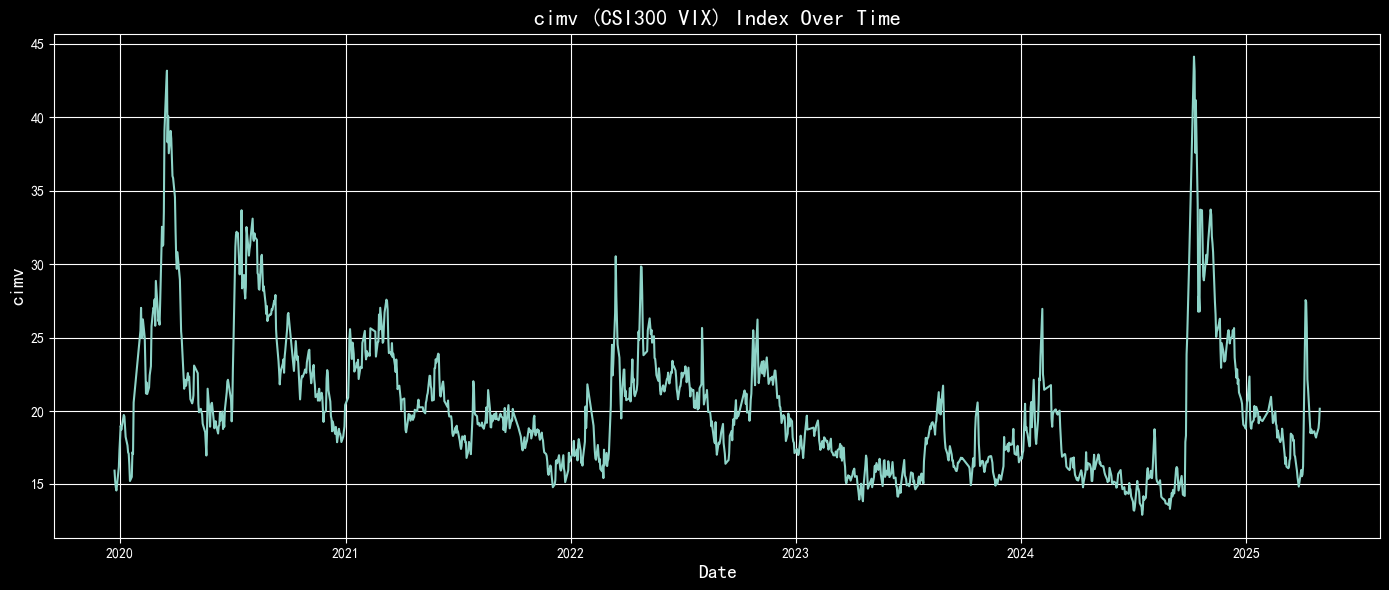

In [208]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))
plt.plot(CIMV_df.index, CIMV_df['cimv'], linewidth=1.5)

plt.title('cimv (CSI300 VIX) Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('cimv', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show();

In [186]:
## download excel doc from: https://xyfintech.pbcsf.tsinghua.edu.cn/info/1014/1116.htm 

cimv_thu = pd.read_excel(r"C:\Users\Administrator\Downloads\df_VIX.xlsx")
cimv_thu['date'] = pd.to_datetime(cimv_thu['date'])
cimv_thu = cimv_thu.set_index('date', drop=True)
cimv_thu.index = cimv_thu.index.date
cimv_thu

,CIMV_SHSE50ETF,CIMV_SHSE300ETF,CIMV_SZSE300ETF,CIMV_CSI300Index
2019-12-23,13.758925,14.223836,14.873303,15.885829
2019-12-24,13.413038,13.833126,13.856245,15.195860
2019-12-25,13.013356,13.818383,13.387050,14.773183
2019-12-26,13.260685,13.452176,13.266962,14.535501
2019-12-27,13.573648,13.658196,13.875737,14.895349
...,...,...,...,...
2023-03-27,16.654501,15.578184,15.859086,15.317071
2023-03-28,16.315983,15.378704,15.577990,14.910568
2023-03-29,16.260789,15.460809,15.629659,15.333823
2023-03-30,15.905587,15.063088,15.149700,15.208264


In [187]:
cimv_csi300 = cimv_thu[['CIMV_CSI300Index']]
CIMV_df = CIMV_df.merge(cimv_csi300, left_index=True, right_index=True, how='left')
CIMV_df

,m1合约,m2合约,end_date_1,MT1,end_date_2,MT2,T1,T2,σ^2_1,σ^2_2,cimv,CIMV_CSI300Index
2019-12-23,IO2002,IO2003,2020-02-21 15:00:00,87300.0,2020-03-20 15:00:00,127620.0,0.166096,0.242808,0.025391,0.027427,15.934609,15.885829
2019-12-24,IO2002,IO2003,2020-02-21 15:00:00,85860.0,2020-03-20 15:00:00,126180.0,0.163356,0.240068,0.023235,0.024466,15.243130,15.195860
2019-12-25,IO2002,IO2003,2020-02-21 15:00:00,84420.0,2020-03-20 15:00:00,124740.0,0.160616,0.237329,0.021963,0.023760,14.820016,14.773183
2019-12-26,IO2002,IO2003,2020-02-21 15:00:00,82980.0,2020-03-20 15:00:00,123300.0,0.157877,0.234589,0.021263,0.023692,14.581723,14.535501
2019-12-27,IO2002,IO2003,2020-02-21 15:00:00,81540.0,2020-03-20 15:00:00,121860.0,0.155137,0.231849,0.022333,0.024091,14.944331,14.895349
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,IO2505,IO2506,2025-05-16 15:00:00,32580.0,2025-06-20 15:00:00,82980.0,0.061986,0.157877,0.031492,0.035419,18.188331,NaN
2025-04-25,IO2505,IO2506,2025-05-16 15:00:00,31140.0,2025-06-20 15:00:00,81540.0,0.059247,0.155137,0.031423,0.036677,18.383687,NaN
2025-04-28,IO2505,IO2506,2025-05-16 15:00:00,26820.0,2025-06-20 15:00:00,77220.0,0.051027,0.146918,0.033474,0.036862,18.826125,NaN
2025-04-29,IO2505,IO2506,2025-05-16 15:00:00,25380.0,2025-06-20 15:00:00,75780.0,0.048288,0.144178,0.034920,0.038471,19.267198,NaN


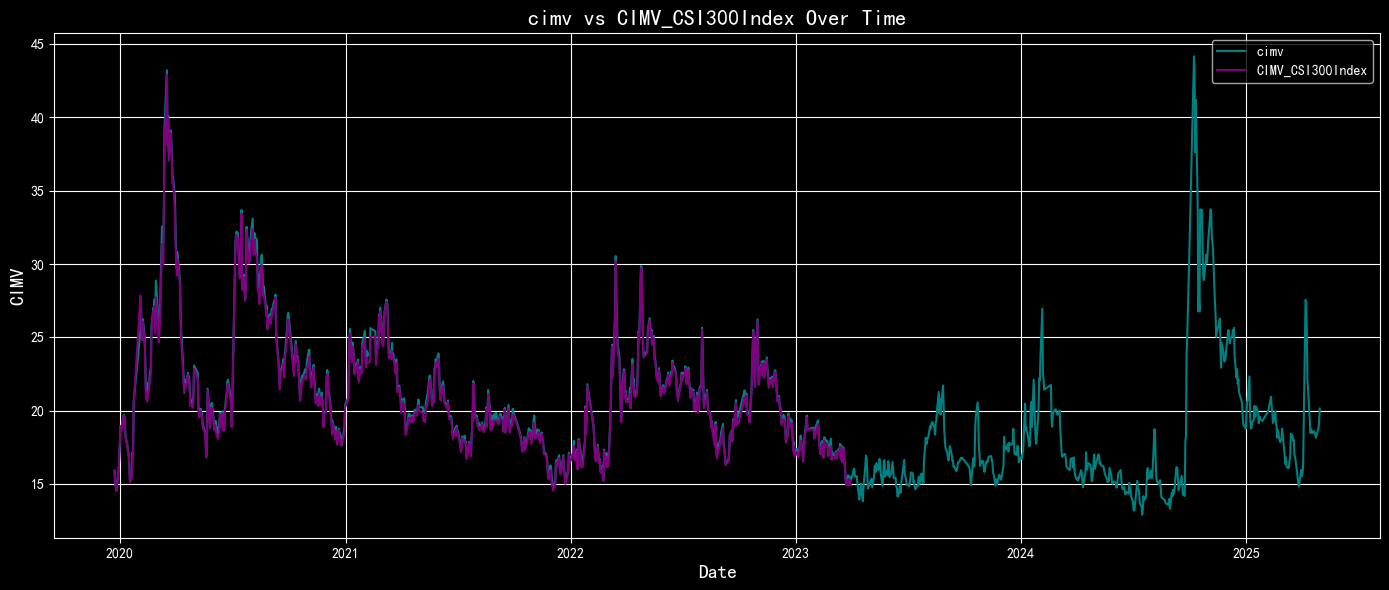

In [206]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))
plt.plot(CIMV_df.index, CIMV_df['cimv'], linewidth=1.5, label='cimv', color='teal')
plt.plot(CIMV_df.index, CIMV_df['CIMV_CSI300Index'], linewidth=1.5, label='CIMV_CSI300Index', color='purple')
plt.title('cimv vs CIMV_CSI300Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('CIMV', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show();

In [204]:
CIMV_df.to_pickle('CIMV_df.pkl')